# Classifying Amazon Reviews

## Buisness Understanding

### Motivation

Every day, we invent on behalf of our customers, partners, and communities. Our vision is ambient intelligence, which uses artificial intelligence (AI) to weave together devices and services in a way that offers more value than any one product could on its own—at home or on the go. Our customers inspire us, and they’ve been at the heart of how we invent and evolve our products.

*- Amazon, Devices and Services 2023*

### Objectives

Our main objective is create a true smart home experience by identifying the needs and requirements of our users.

Users opinion are very valuable to us as it allows us to improve the quality of the response of our devices.

Therefore, when analysing reviews, we will find the user's favorite skills as well as the most common problems in certain 
versions or models.

At the same time, we are interested in creating an automatic learning model that allows us to classify whether a review is positive or negative based on its content and keywords, that way we can give immediate attention to those users who are dissatisfied with your product.

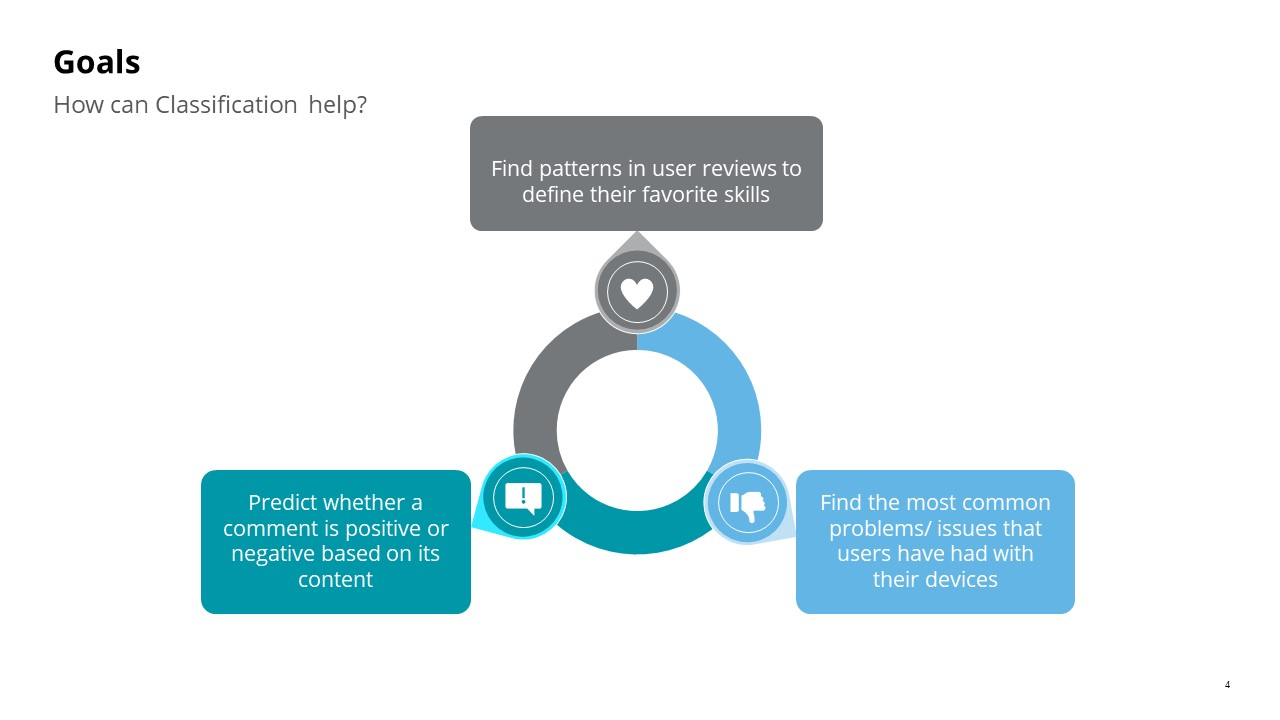

## Data Understanding

The data set we used for our research is made up of more than 3,000 user reviews of aleza devices like Echo, Echo Dot, Fire 
Sticks, etc.

For each review we have user's comment in plain text, date on which it was published and the variation of the model to which the users are referring. 

A rating given by the user is also included, this can vary between 1 and 5, with 5 being the best rating. Last but very important, a label that indicates whether a comment is positive or negative, 1 for positive comments and 0 for negatives.

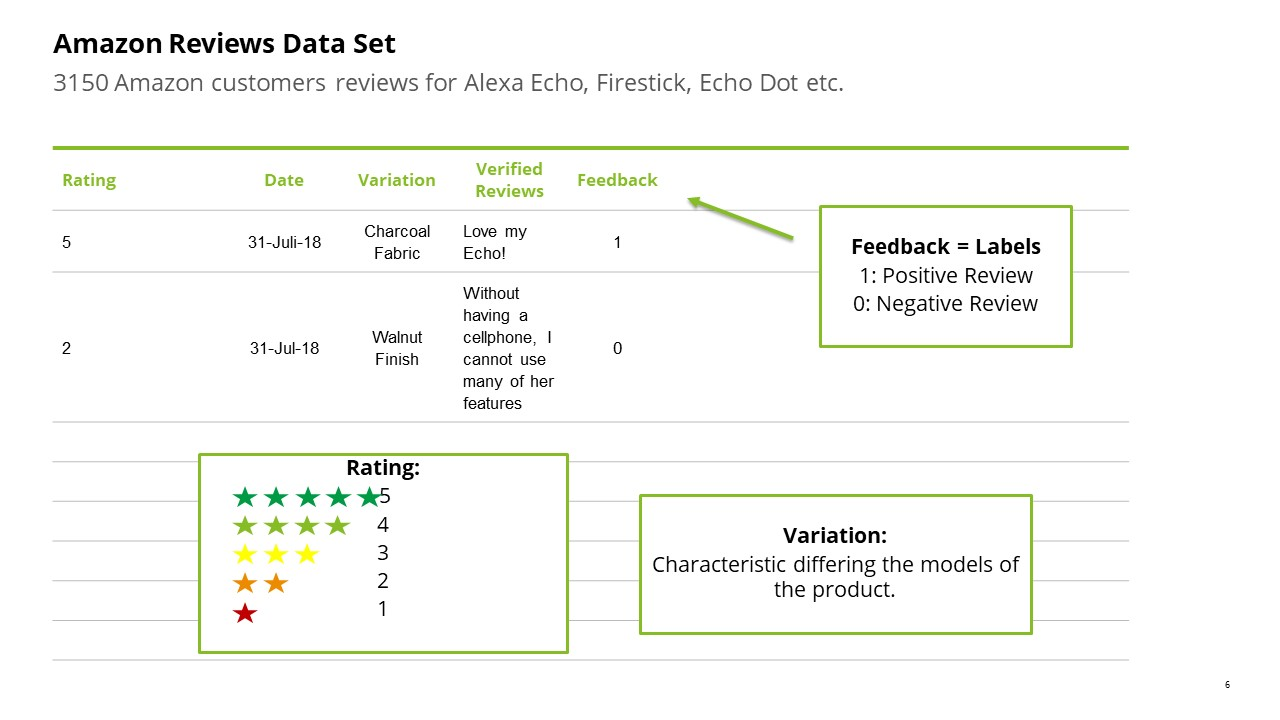

## Data Preparation

Before analysing of the data, it's necessary to clean it, this will eliminate information that is not useful, and structure it so that all values of the same type have the same format, either numerical or text, depending on the case.

### Importing Packages

In [1]:
# Data Manage 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Working with dictionaries
import collections
import operator

# Text cleaning
import re
import math
import nltk 
from nltk.corpus import stopwords
import string
from nltk import word_tokenize
from nltk import FreqDist
import string
from nltk.stem import WordNetLemmatizer

# WordCloud Visualization
from wordcloud import WordCloud

# Encoders for categorical Data
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder

# Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

# Test Model 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# Term Features Matrix + Clustering
#from sklearn.cluster import KMeans

In [2]:
# Uncomment in case of need to download

#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('omw-1.4')

### Data Extraction

This data set has been downloaded from the Amazon ficial web site at: https://www.kaggle.com/datasets/sid321axn/amazon-alexa-reviews , enter the link and click on "Download". Make shure to add the rute of the folder where you have saved the data. 

In [3]:
amazon_reviews_df = pd.read_table('C:/Users/fmartinezflores/Documents/Flatiron/DS-Deloitte-1003-c3/ClusteringAmazonReviews_2/ClusteringAmazonReviews/amazon_alexa.tsv')


amazon_reviews_df.head(5)

rating       date         variation  \
0       5  31-Jul-18  Charcoal Fabric    
1       5  31-Jul-18  Charcoal Fabric    
2       4  31-Jul-18    Walnut Finish    
3       5  31-Jul-18  Charcoal Fabric    
4       5  31-Jul-18  Charcoal Fabric    

                                    verified_reviews  feedback  
0                                      Love my Echo!         1  
1                                          Loved it!         1  
2  Sometimes while playing a game, you can answer...         1  
3  I have had a lot of fun with this thing. My 4 ...         1  
4                                              Music         1

#### Counting misssing values in the data set. There are no missing values.

In [4]:
# Counting missing values
amazon_reviews_df.isna().sum()

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

#### Removing duplicate records

In [5]:
# Removing duplicate records
amazon_reviews_df = amazon_reviews_df.drop_duplicates()

#### Data tipe of each feature.

In [6]:
# Data frame overview. Column information, name-data type.
amazon_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2435 entries, 0 to 2800
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            2435 non-null   int64 
 1   date              2435 non-null   object
 2   variation         2435 non-null   object
 3   verified_reviews  2435 non-null   object
 4   feedback          2435 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 114.1+ KB


### Reviews Overview

In [7]:
_reviews = amazon_reviews_df['verified_reviews']

for i in range(10):
    print(_reviews[i])
    print('--------------')
  

Love my Echo!
--------------
Loved it!
--------------
Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.
--------------
I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.
--------------
Music
--------------
I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.
--------------
Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be 

### General Analysis

#### Counting Ratings

Text(0.5, 1.0, 'Raitings')

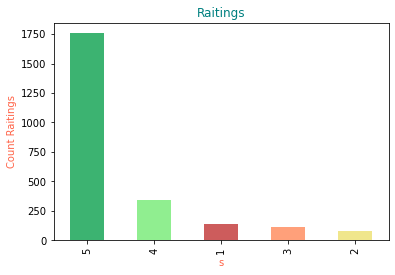

In [8]:
# Plotting
amazon_reviews_df['rating'].value_counts().plot(kind='bar', 

                                                color=['mediumseagreen','lightgreen', 'indianred', 'lightsalmon',  'khaki']);
# Graph attributes
plt.xlabel('s', color='tomato')
plt.ylabel('Count Raitings', color='tomato')
plt.title('Raitings', color='teal')

#### Counting Feedback

Text(0.5, 1.0, 'Feedback')

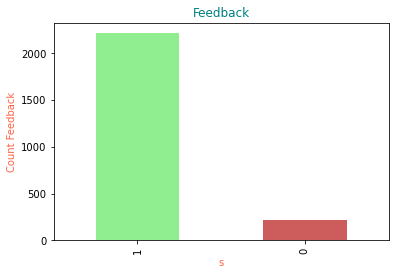

In [45]:
# TRANSFORMAR EN PIE CHART: POSITIVE AND NEGATIVE FEEDBACK
# Plotting
amazon_reviews_df['feedback'].value_counts().plot(kind='bar', color=['lightgreen', 'indianred']);

# Graph attributes
plt.xlabel('s', color='tomato')
plt.ylabel('Count Feedback', color='tomato')
plt.title('Feedback', color='teal')

In [46]:
amazon_reviews_df.groupby(['feedback']).sum().plot(kind='pie', y='feedback')

KeyError: 'feedback'

Most of the reviews are positive.

### Ratings By Date

Changing Date type from object to date-time, this way it will be easier to work with this information. 

In [10]:
# Changing string date to Date
amazon_reviews_df['date'] = pd.to_datetime(amazon_reviews_df['date'])

Text(0.5, 1.0, 'Ratings By Date')

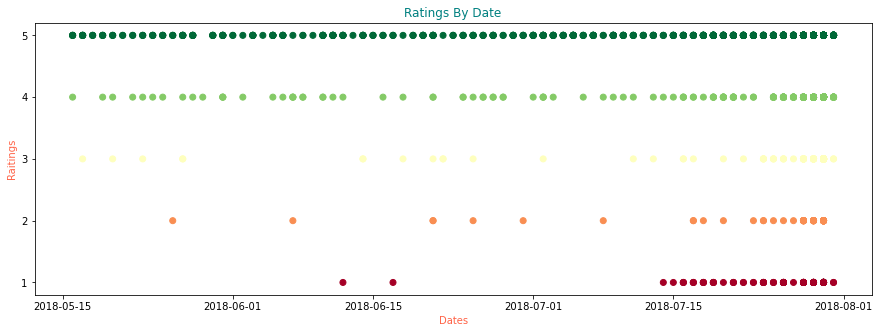

In [11]:
# Visualizing ratings by date
dates = amazon_reviews_df['date'].sort_values()
ratings = amazon_reviews_df['rating']

# Graph attributes
plt.figure(figsize=(15,5))
plt.yticks([1, 2, 3, 4, 5])
plt.scatter(dates, ratings, 
         c = ratings,
         cmap = 'RdYlGn')

plt.xlabel('Dates', color='tomato')
plt.ylabel('Raitings', color='tomato')
plt.title('Ratings By Date', color='teal')

The number of positive reviews keeps constant while the negative reviews have increased in the last analyzed period.

### Analysing Reviews

<AxesSubplot:title={'center':'Reviews by Variation'}, xlabel='variation'>

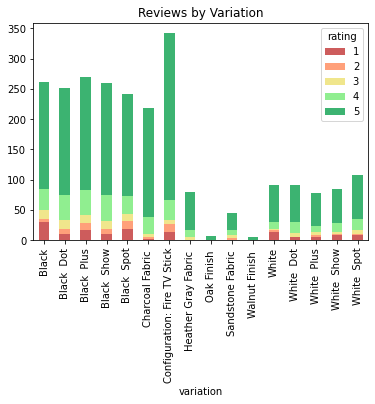

In [12]:
# Reviews by variation

# Visualizing data
amazon_reviews_df.groupby(['variation', 'rating']).size().unstack().plot(kind='bar', 
                                                                         stacked=True, 
                                                                         title='Reviews by Variation',
                                                                         color = ['indianred','lightsalmon','khaki','lightgreen','mediumseagreen'])

Top 5 variations with most feedback:
 1. Fire TV Stick
 2. Black Plus
 3. Black 
 4. Black Show
 5. Black Dot

<AxesSubplot:title={'center':'Variation Distribution'}>

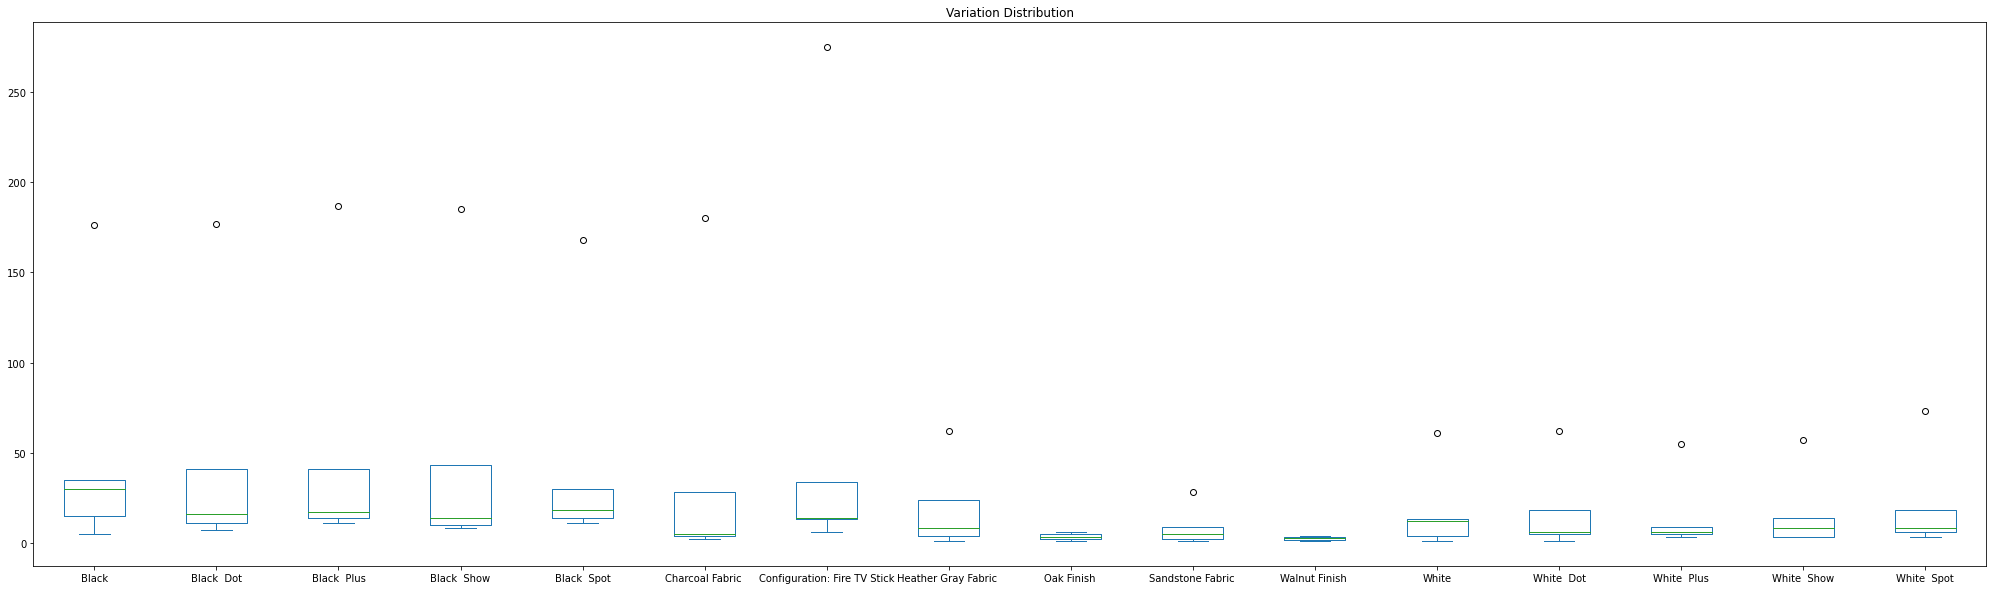

In [13]:
# Graph attributes
amazon_reviews_df.groupby(['rating', 'variation']).size().unstack().plot(kind='box', figsize=(35,10), 
                                                                         title = 'Variation Distribution') # SIZE (X,Y)

Feedback medians are between the 10 -45.

### Analysis by Periods of time

Each period takes 2 weeks, have 5 periods:

- Period 1: 2018-05-15 - 2018-06-01*
- Period 2: 2018-06-01 - 2018-06-15
- Period 3: 2018-06-15 - 2018-07-01
- Period 4: 2018-07-01 - 2018-07-15
- Period 5: 2018-07-15 - 2018-08-01

In [14]:
period_01 = amazon_reviews_df.loc[(amazon_reviews_df['date'] >= '2018-05-15') & (amazon_reviews_df['date'] < '2018-06-01')]
period_02 = amazon_reviews_df.loc[(amazon_reviews_df['date'] >= '2018-06-01') & (amazon_reviews_df['date'] < '2018-06-15')]
period_03 = amazon_reviews_df.loc[(amazon_reviews_df['date'] >= '2018-06-15') & (amazon_reviews_df['date'] < '2018-07-01')]
period_04 = amazon_reviews_df.loc[(amazon_reviews_df['date'] >= '2018-07-01') & (amazon_reviews_df['date'] < '2018-07-15')]
period_05 = amazon_reviews_df.loc[(amazon_reviews_df['date'] >= '2018-07-15') & (amazon_reviews_df['date'] < '2018-08-01')]

<AxesSubplot:title={'center':'Period 01 Reviews by Variation'}, xlabel='variation'>

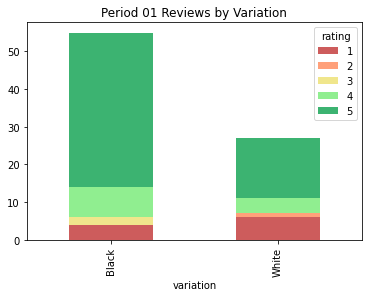

In [15]:
# Visualizing Period 01
period_01.groupby(['variation', 'rating']).size().unstack().plot(kind='bar', 
                                                                         stacked=True, 
                                                                         title='Period 01 Reviews by Variation',
                                                                         color = ['indianred','lightsalmon','khaki','lightgreen','mediumseagreen'])

<AxesSubplot:title={'center':'Period 02 Reviews by Variation'}, xlabel='variation'>

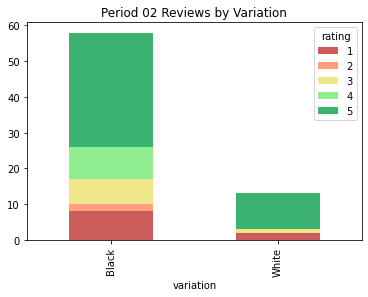

In [16]:
# Visualizing Period 02
period_02.groupby(['variation', 'rating']).size().unstack().plot(kind='bar', 
                                                                         stacked=True, 
                                                                         title='Period 02 Reviews by Variation',
                                                                         color = ['indianred','lightsalmon','khaki','lightgreen','mediumseagreen'])

<AxesSubplot:title={'center':'Period 03 Reviews by Variation'}, xlabel='variation'>

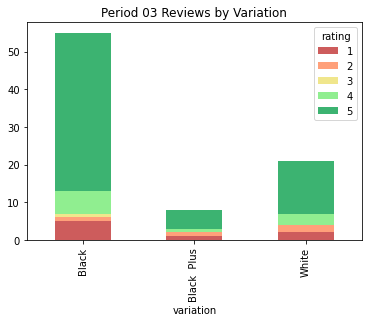

In [17]:
# Visualizing Period 03
period_03.groupby(['variation', 'rating']).size().unstack().plot(kind='bar', 
                                                                         stacked=True, 
                                                                         title='Period 03 Reviews by Variation',
                                                                         color = ['indianred','lightsalmon','khaki','lightgreen','mediumseagreen'])

<AxesSubplot:title={'center':'Period 04 Reviews by Variation'}, xlabel='variation'>

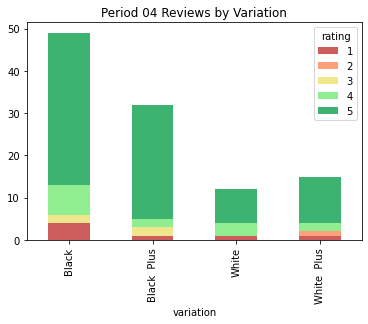

In [18]:
# Visualizing Period 04
period_04.groupby(['variation', 'rating']).size().unstack().plot(kind='bar', 
                                                                         stacked=True, 
                                                                         title='Period 04 Reviews by Variation',
                                                                         color = ['indianred','lightsalmon','khaki','lightgreen','mediumseagreen'])

<AxesSubplot:title={'center':'Period 05 Reviews by Variation'}, xlabel='variation'>

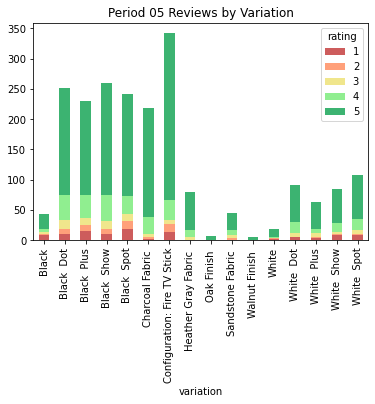

In [19]:
# Visualizing Period 05
period_05.groupby(['variation', 'rating']).size().unstack().plot(kind='bar', 
                                                                         stacked=True, 
                                                                         title='Period 05 Reviews by Variation',
                                                                         color = ['indianred','lightsalmon','khaki','lightgreen','mediumseagreen'])

There has been more reviews in the last period. The number of variations (sources from which users have uploaded their reviews) has increased. Resulting in an increase in both positive and negative reviews


## Text Analysis

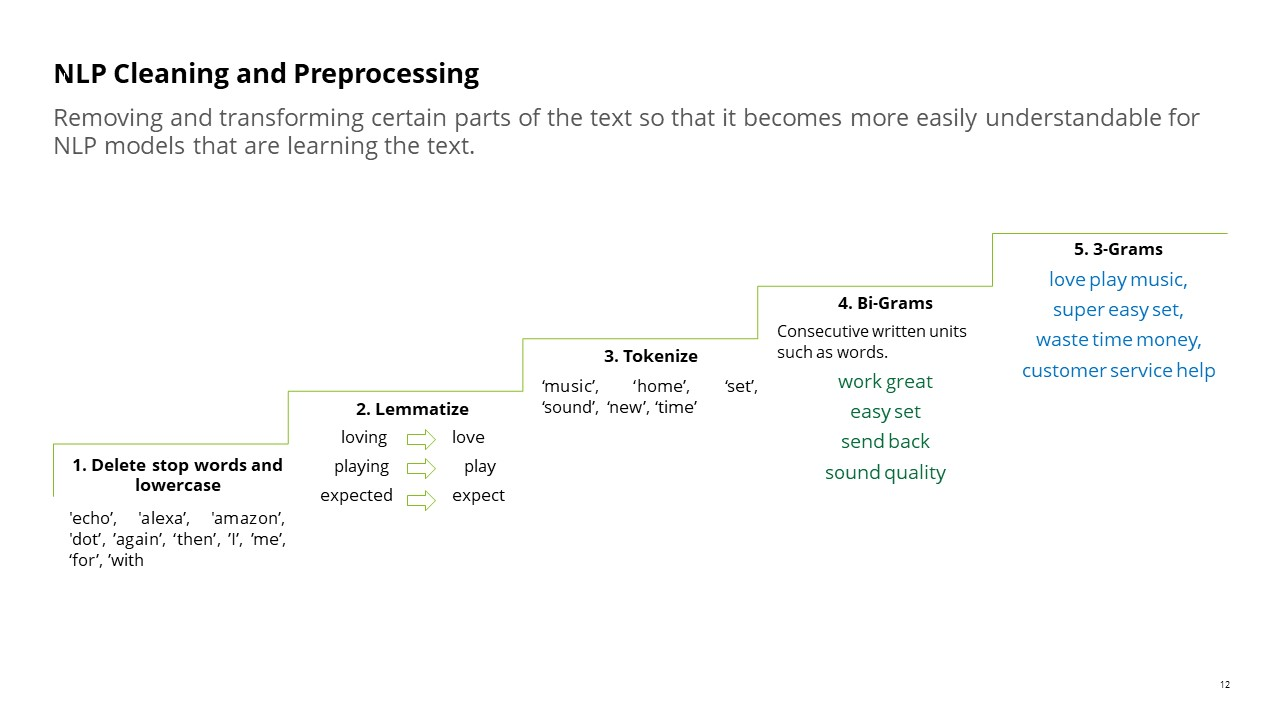

#### Cleaning and Preprocessing 


In [20]:
# Function that cleans one review at a time by calling the next function 
# it returns the set of tokens in the review
def clean_review(review):
        return joining_tokens(review.strip(),s_w)

# Function that joins all the cleaned words (tokens) to use them in a review
def joining_tokens(word, stop_words):
    token = cleaning_token(word, stop_words)
    tokens_from_review = " ".join(token)
    return tokens_from_review    

#  Getting rid of stop words and also removing short or long words. 
# This function cleans one token at a time .
def cleaning_token(raw_token, stop_words):
    raw_token = raw_token.lower() #([a-zA-Z]+(?:'[a-z]+)?)
    raw_tokens = re.findall('[a-záéíóúüñ]+', raw_token)# Making sure synopsis words dont have a-záéíóúüñ 
    clean_tokens = [w for w in raw_tokens if ((not w in stop_words) and len(w)>=3 and len(w)<=24)] # Keeping only words ->
    return clean_tokens 

s_w = stopwords.words('english')
s_w += list(string.punctuation)
# More words that we can ignore to refine our vocabulary 
s_w.extend(['echo','alexa','amazon','dot','purchased','one', 'two','zzzzzzz','zzzz', 'device', 'thing'])
#s_w

In [21]:
# Creating new column with the cleaned reviews
amazon_reviews_df['cleaned_reviews'] = amazon_reviews_df['verified_reviews'].apply(lambda r: clean_review(r))
amazon_reviews_df.head(5)

rating       date         variation  \
0       5 2018-07-31  Charcoal Fabric    
1       5 2018-07-31  Charcoal Fabric    
2       4 2018-07-31    Walnut Finish    
3       5 2018-07-31  Charcoal Fabric    
4       5 2018-07-31  Charcoal Fabric    

                                    verified_reviews  feedback  \
0                                      Love my Echo!         1   
1                                          Loved it!         1   
2  Sometimes while playing a game, you can answer...         1   
3  I have had a lot of fun with this thing. My 4 ...         1   
4                                              Music         1   

                                     cleaned_reviews  
0                                               love  
1                                              loved  
2  sometimes playing game answer question correct...  
3  lot fun old learns dinosaurs control lights pl...  
4                                              music

### Normalizing Words

Lemmatization reduces each word down to a linguistically valid lemma, or root word. It does this through stored linguistic mappings.

In [22]:
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word,pos='v') for word in words]
    return ' '.join(words)

In [23]:
# Creating new column with the cleaned reviews
amazon_reviews_df['cleaned_reviews'] = amazon_reviews_df['cleaned_reviews'].apply(lambda r: lemmatize_words(r))
amazon_reviews_df.head(15)

rating       date             variation  \
0        5 2018-07-31      Charcoal Fabric    
1        5 2018-07-31      Charcoal Fabric    
2        4 2018-07-31        Walnut Finish    
3        5 2018-07-31      Charcoal Fabric    
4        5 2018-07-31      Charcoal Fabric    
5        5 2018-07-31  Heather Gray Fabric    
6        3 2018-07-31     Sandstone Fabric    
7        5 2018-07-31      Charcoal Fabric    
8        5 2018-07-30  Heather Gray Fabric    
9        5 2018-07-30  Heather Gray Fabric    
10       5 2018-07-30      Charcoal Fabric    
11       5 2018-07-30      Charcoal Fabric    
12       5 2018-07-30           Oak Finish    
13       5 2018-07-30      Charcoal Fabric    
14       5 2018-07-30           Oak Finish    

                                     verified_reviews  feedback  \
0                                       Love my Echo!         1   
1                                           Loved it!         1   
2   Sometimes while playing a game, you can answer...         1   
3   I have had a lot of fun with this thing. My 4 ...         1   
4                                               Music         1   
5   I received the echo as a gift. I needed anothe...         1   
6   Without having a cellphone, I cannot use many ...         1   
7   I think this is the 5th one I've purchased. I'...         1   
8                                         looks great         1   
9   Love it! I’ve listened to songs I haven’t hear...         1   
10  I sent it to my 85 year old Dad, and he talks ...         1   
11  I love it! Learning knew things with it eveyda...         1   
12  I purchased this for my mother who is having k...         1   
13                                 Love, Love, Love!!         1   
14                           Just what I expected....         1   

                                      cleaned_reviews  
0                                                love  
1                                                love  
2   sometimes play game answer question correctly ...  
3   lot fun old learn dinosaurs control light play...  
4                                               music  
5   receive gift need another bluetooth something ...  
6   without cellphone cannot use many feature ipad...  
7   think work get every room house really like fe...  
8                                          look great  
9   love listen songs hear since childhood get new...  
10                  send year old dad talk constantly  
11  love learn know things eveyday still figure ev...  
12  mother knee problems give something try come g...  
13                                     love love love  
14                                             expect

#### Frequency Distributions

In [24]:
def frequency_distributions(reviews, s_w):
    bag_of_words = []    # Vocabulary joins all synopsis words with matching Genre and Decade 
    for rev in reviews :
        token = cleaning_token(rev.strip(),s_w) # striping word from synopsis, this will clean a word at a time
        bag_of_words.extend(token)
    return dict(collections.Counter(bag_of_words))

word_count = frequency_distributions(_reviews, s_w)

# Sorting the words in ascending order according to their number of repetitions, this way we find the most popular words
sorted_word_count = sorted(word_count.items(), key=operator.itemgetter(1), reverse=True)

#len(sorted_repetitions) # type: list, 3758
print("Top 25 Most Popular Words")
top_25 = sorted_word_count[:25]
top_25

Top 25 Most Popular Words


[('love', 746),
 ('great', 565),
 ('like', 387),
 ('use', 372),
 ('music', 369),
 ('works', 311),
 ('easy', 270),
 ('sound', 240),
 ('set', 231),
 ('good', 216),
 ('product', 207),
 ('get', 196),
 ('would', 185),
 ('home', 168),
 ('bought', 164),
 ('time', 156),
 ('speaker', 154),
 ('new', 152),
 ('still', 150),
 ('show', 149),
 ('really', 147),
 ('smart', 143),
 ('much', 142),
 ('also', 139),
 ('play', 138)]

### Word cloud

#### Positive Words

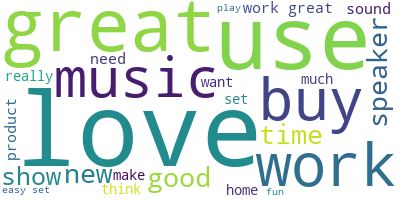

In [25]:
# Positive Words
positive_revs = amazon_reviews_df['cleaned_reviews'].loc[amazon_reviews_df['feedback'] == 1]
# Need to have all words in a string to create a Word Cloud
all_positive_words = ','.join(list(positive_revs)) 

# Create a WordCloud object
wordcloud_01 = WordCloud(background_color="white", max_words=25, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud_01.generate(all_positive_words)

# Visualize the word cloud
wordcloud_01.to_image()

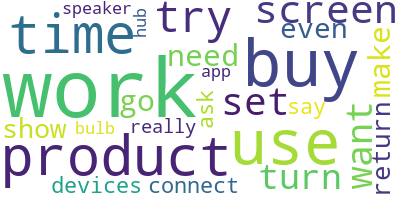

In [26]:
# Negative Words
negative_revs = amazon_reviews_df['cleaned_reviews'].loc[amazon_reviews_df['feedback'] == 0]
all_negative_words = ','.join(list(negative_revs)) 

# Create a WordCloud object
wordcloud_00 = WordCloud(background_color="white", max_words=25, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud_00.generate(all_negative_words)

# Visualize the word cloud
wordcloud_00.to_image()

### N-Grams for Positive Reviews

#### Bi-gram for positive reviews

In [27]:
#reviews = amazon_reviews_df['cleaned_reviews']
reviews = positive_revs

#Vectorizing words with bi-grams
ng_model = CountVectorizer(min_df = 18 , ngram_range = (2, 2))
matrix = ng_model.fit_transform(reviews).toarray()

# Creating new df with data transformation
df_bigrams = pd.DataFrame(data = matrix, columns = ng_model.get_feature_names())

# Sum of bigram repetitions
total = df_bigrams.sum()

# Transposing 
df_bigramsT = df_bigrams.T

# Assign sum of all rows of DataFrame as a new column
df_bigramsT['Total'] = total

# Sorting by sum columns
df_bigramsT = df_bigramsT.sort_values(['Total'], ascending=[False])

df_bigramsT.head(10)



C:\Users\fmartinezflores\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


0  1  2  3  4  5  6  7  8  9  ...  2205  2206  2207  2208  \
work great     0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0   
easy set       0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0   
play music     0  0  0  1  0  1  0  1  0  0  ...     0     0     0     0   
easy use       0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0   
prime day      0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0   
great product  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0   
sound quality  0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0   
still learn    0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0   
work well      0  0  0  0  0  0  0  0  0  0  ...     0     0     0     0   
listen music   0  0  0  0  0  0  0  0  0  0  ...     0     0     0     1   

               2209  2210  2211  2212  2213  Total  
work great        0     0     0     0     0    132  
easy set          0     0     0     0     1     99  
play music        0     1     0     0     0     90  
easy use          0     0     0     0     0     71  
prime day         0     0     0     0     0     66  
great product     0     0     0     0     0     64  
sound quality     0     1     0     0     0     56  
still learn       0     0     0     0     0     51  
work well         0     0     0     0     0     50  
listen music      0     0     0     0     0     48  

[10 rows x 2215 columns]

#### Bi-gram for negative reviews

In [28]:
#reviews = amazon_reviews_df['cleaned_reviews']
reviews = negative_revs

#Vectorizing words with bi-grams
ng_model = CountVectorizer(ngram_range = (2, 2))
matrix = ng_model.fit_transform(reviews).toarray()

# Creating new df with data transformation
df_bigrams = pd.DataFrame(data = matrix, columns = ng_model.get_feature_names())

# Sum of bigram repetitions
total = df_bigrams.sum()

# Transposing 
df_bigramsT = df_bigrams.T

# Assign sum of all rows of DataFrame as a new column
df_bigramsT['Total'] = total

# Sorting by sum columns
df_bigramsT = df_bigramsT.sort_values(['Total'], ascending=[False])

df_bigramsT.head(10)

C:\Users\fmartinezflores\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


0  1  2  3  4  5  6  7  8  9  ...  212  213  214  215  216  \
things try     0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0   
stop work      0  0  0  1  0  0  0  0  0  0  ...    0    0    0    0    0   
work fine      0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0   
send back      0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0   
play music     0  0  0  0  0  0  0  0  0  0  ...    0    0    0    1    0   
buy refurbish  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0   
sound quality  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0   
buy another    0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0   
half time      0  0  0  0  0  0  0  0  0  0  ...    0    1    0    0    0   
get work       0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0   

               217  218  219  220  Total  
things try       0    0    0    0     11  
stop work        0    0    0    0      9  
work fine        0    0    0    0      7  
send back        0    0    0    0      7  
play music       0    0    0    0      7  
buy refurbish    0    0    0    0      7  
sound quality    0    2    0    0      6  
buy another      0    1    0    0      5  
half time        0    0    0    0      5  
get work         0    0    0    0      5  

[10 rows x 222 columns]

Can observe that in both positive and negative reviews people talk about similar topics like: 
music, sound quality

#### Tri-grams for positive reviews

In [29]:
#reviews = amazon_reviews_df['cleaned_reviews']
reviews = positive_revs

#Vectorizing words with bi-grams
ng_model = CountVectorizer(min_df = 3, ngram_range = (3, 3))
matrix = ng_model.fit_transform(reviews).toarray()

# Creating new df with data transformation
df_bigrams = pd.DataFrame(data = matrix, columns = ng_model.get_feature_names())

# Sum of bigram repetitions
total = df_bigrams.sum()

# Transposing matrix
df_bigramsT = df_bigrams.T

# Assign sum of all rows of DataFrame as a new column
df_bigramsT['Total'] = total

# Sorting by sum columns
df_bigramsT = df_bigramsT.sort_values(['Total'], ascending=[False])

df_bigramsT.head(10)

C:\Users\fmartinezflores\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


0  1  2  3  4  5  6  7  8  9  ...  2205  2206  2207  \
easy set use         0  0  0  0  0  0  0  0  0  0  ...     0     0     0   
love fire stick      0  0  0  0  0  0  0  0  0  0  ...     0     0     0   
love love love       0  0  0  0  0  0  0  0  0  0  ...     0     0     0   
buy prime day        0  0  0  0  0  0  0  0  0  0  ...     0     0     0   
still learn use      0  0  0  0  0  0  0  0  0  0  ...     0     0     0   
super easy set       0  0  0  0  0  0  0  0  0  0  ...     0     0     0   
love play music      0  0  0  0  0  0  0  0  0  0  ...     0     0     0   
get prime day        0  0  0  0  0  0  0  0  0  0  ...     0     0     0   
great sound quality  0  0  0  0  0  0  0  0  0  0  ...     0     0     0   
work like new        0  0  0  0  0  0  0  0  0  0  ...     0     0     0   

                     2208  2209  2210  2211  2212  2213  Total  
easy set use            0     0     0     0     0     1     15  
love fire stick         0     0     0     0     0     0     15  
love love love          0     0     0     0     0     0     14  
buy prime day           0     0     0     0     0     0     13  
still learn use         0     0     0     0     0     0     10  
super easy set          0     0     0     0     0     0      8  
love play music         0     0     0     0     0     0      8  
get prime day           0     0     0     0     0     0      8  
great sound quality     0     0     0     0     0     0      7  
work like new           0     0     0     0     0     0      7  

[10 rows x 2215 columns]

#### Tri-grams for negative reviews

In [30]:
#reviews = amazon_reviews_df['cleaned_reviews']
reviews = negative_revs

#Vectorizing words with bi-grams
ng_model = CountVectorizer(ngram_range = (3, 3))
matrix = ng_model.fit_transform(reviews).toarray()

# Creating new df with data transformation
df_bigrams = pd.DataFrame(data = matrix, columns = ng_model.get_feature_names())

# Sum of bigram repetitions
total = df_bigrams.sum()

# Transposing 
df_bigramsT = df_bigrams.T

# Assign sum of all rows of DataFrame as a new column
df_bigramsT['Total'] = total

# Sorting by sum columns
df_bigramsT = df_bigramsT.sort_values(['Total'], ascending=[False])

df_bigramsT.head(10)

C:\Users\fmartinezflores\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


0  1  2  3  4  5  6  7  8  9  ...  212  213  214  215  \
turn things try        0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0   
things try screen      0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0   
want buy another       0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0   
waste time money       0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0   
never buy anything     0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0   
reason give star       0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0   
buy another hub        0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0   
customer service help  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0   
digital photo screen   0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0   
get act together       0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0   

                       216  217  218  219  220  Total  
turn things try          0    0    0    0    0      3  
things try screen        0    0    0    0    0      3  
want buy another         0    0    0    0    0      3  
waste time money         0    0    0    0    0      2  
never buy anything       0    0    0    0    0      2  
reason give star         0    0    0    0    0      2  
buy another hub          0    0    0    0    0      2  
customer service help    0    0    0    0    0      2  
digital photo screen     0    0    0    0    0      2  
get act together         0    0    0    0    0      2  

[10 rows x 222 columns]

## Modeling

#### Mean of words in reviews

In [31]:
amazon_reviews_df['count_words'] = amazon_reviews_df['cleaned_reviews'].str.split().str.len()
print('Averange number of words in reviews: ',amazon_reviews_df['count_words'].mean())

Averange number of words in reviews:  11.855441478439426


### Creating Model

To create the model we must consider: 
    
 - What's the best feature from our data frame? The split is based on the best feature.
 - Which is the best algorithm to start deciding, entropy or ginni index?
 - Best sizes for training and test sets.
 - Best encoder. One hot encoder, vector count, binary count, TF-IDF?
 - Max depth, how many levels will our tree have? 
 - Pruning in case it's necesary
 - Accuracy, scores and interpretation of Confusion Matrix. 

Reviews are choosen as the input feature in the model becuase its content will determine the parameters to predict if a new comment is positive or negative 

I decided to create different modeles each one with different paramaters in order to compare their accuracy and precision to predict if an input is a positive or negative review. 

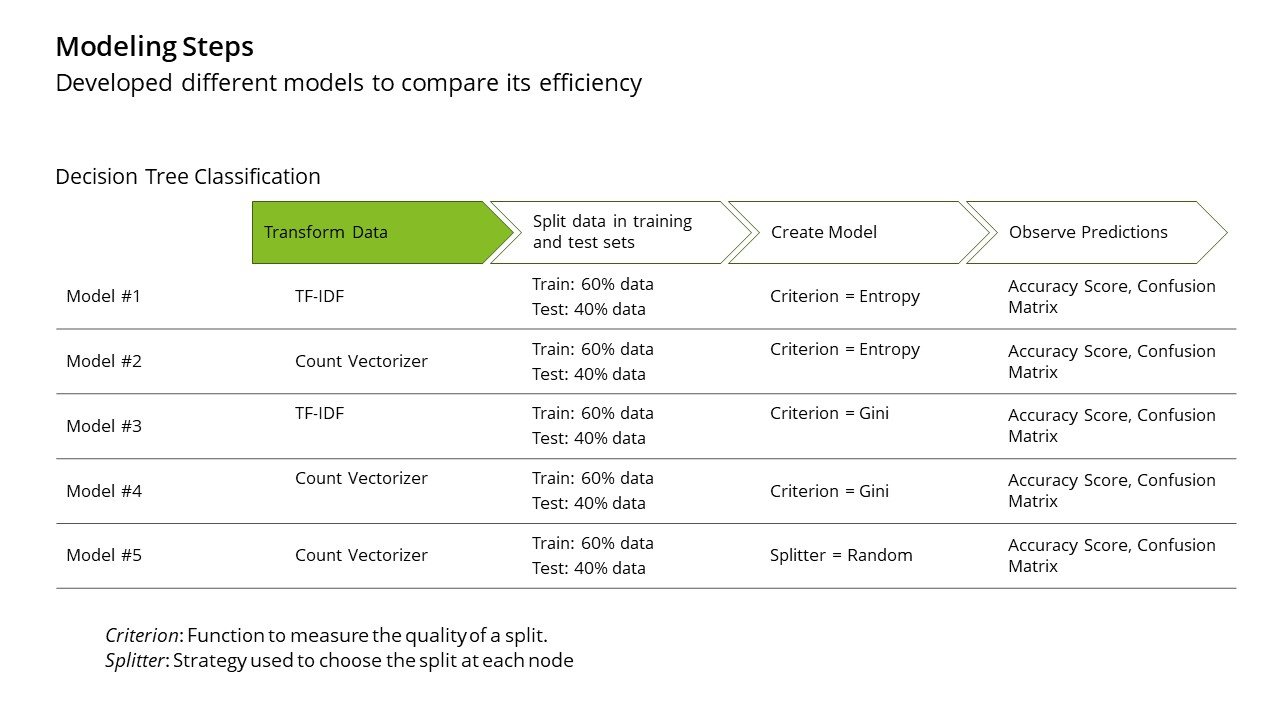

### Model 1

#### Using TF-IDF

In [32]:
# Initialize the vectorizer
vectorizer = TfidfVectorizer()

# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer.fit_transform(amazon_reviews_df['cleaned_reviews'])
y = amazon_reviews_df[['feedback']]

#X.shape # There are 2435 vectors (one for each review), each with 828 dimensions (one for each word).
#X[0]
#vectorizer.get_feature_names_out()

#### Creating training and test sets

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train 

<1704x3002 sparse matrix of type '<class 'numpy.float64'>'
	with 18337 stored elements in Compressed Sparse Row format>

In [34]:
# Create the classifier, fit it on the training data and make predictions on the test set
clf_01 = DecisionTreeClassifier(criterion='entropy', max_depth= 10)

clf_01.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

#### Observing Predictions

In [35]:
# Predictions
prediction_01 = clf_01.predict(X_test)
#prediction_01

In [36]:
accuracy_score(y_test, prediction_01)

0.9069767441860465

C:\Users\fmartinezflores\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


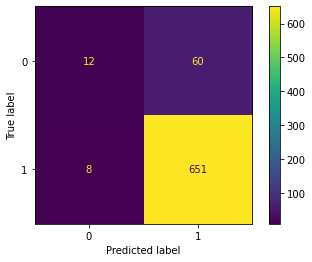

In [37]:
# Confusion Matrix
plot_confusion_matrix(clf_01, X_test, y_test, values_format='.3g')
plt.show()

In [38]:
print(classification_report(y_test, prediction_01, target_names = ['positive_feedback','negative_feedback']))

                   precision    recall  f1-score   support

positive_feedback       0.60      0.17      0.26        72
negative_feedback       0.92      0.99      0.95       659

         accuracy                           0.91       731
        macro avg       0.76      0.58      0.61       731
     weighted avg       0.88      0.91      0.88       731



#### Ploting Model

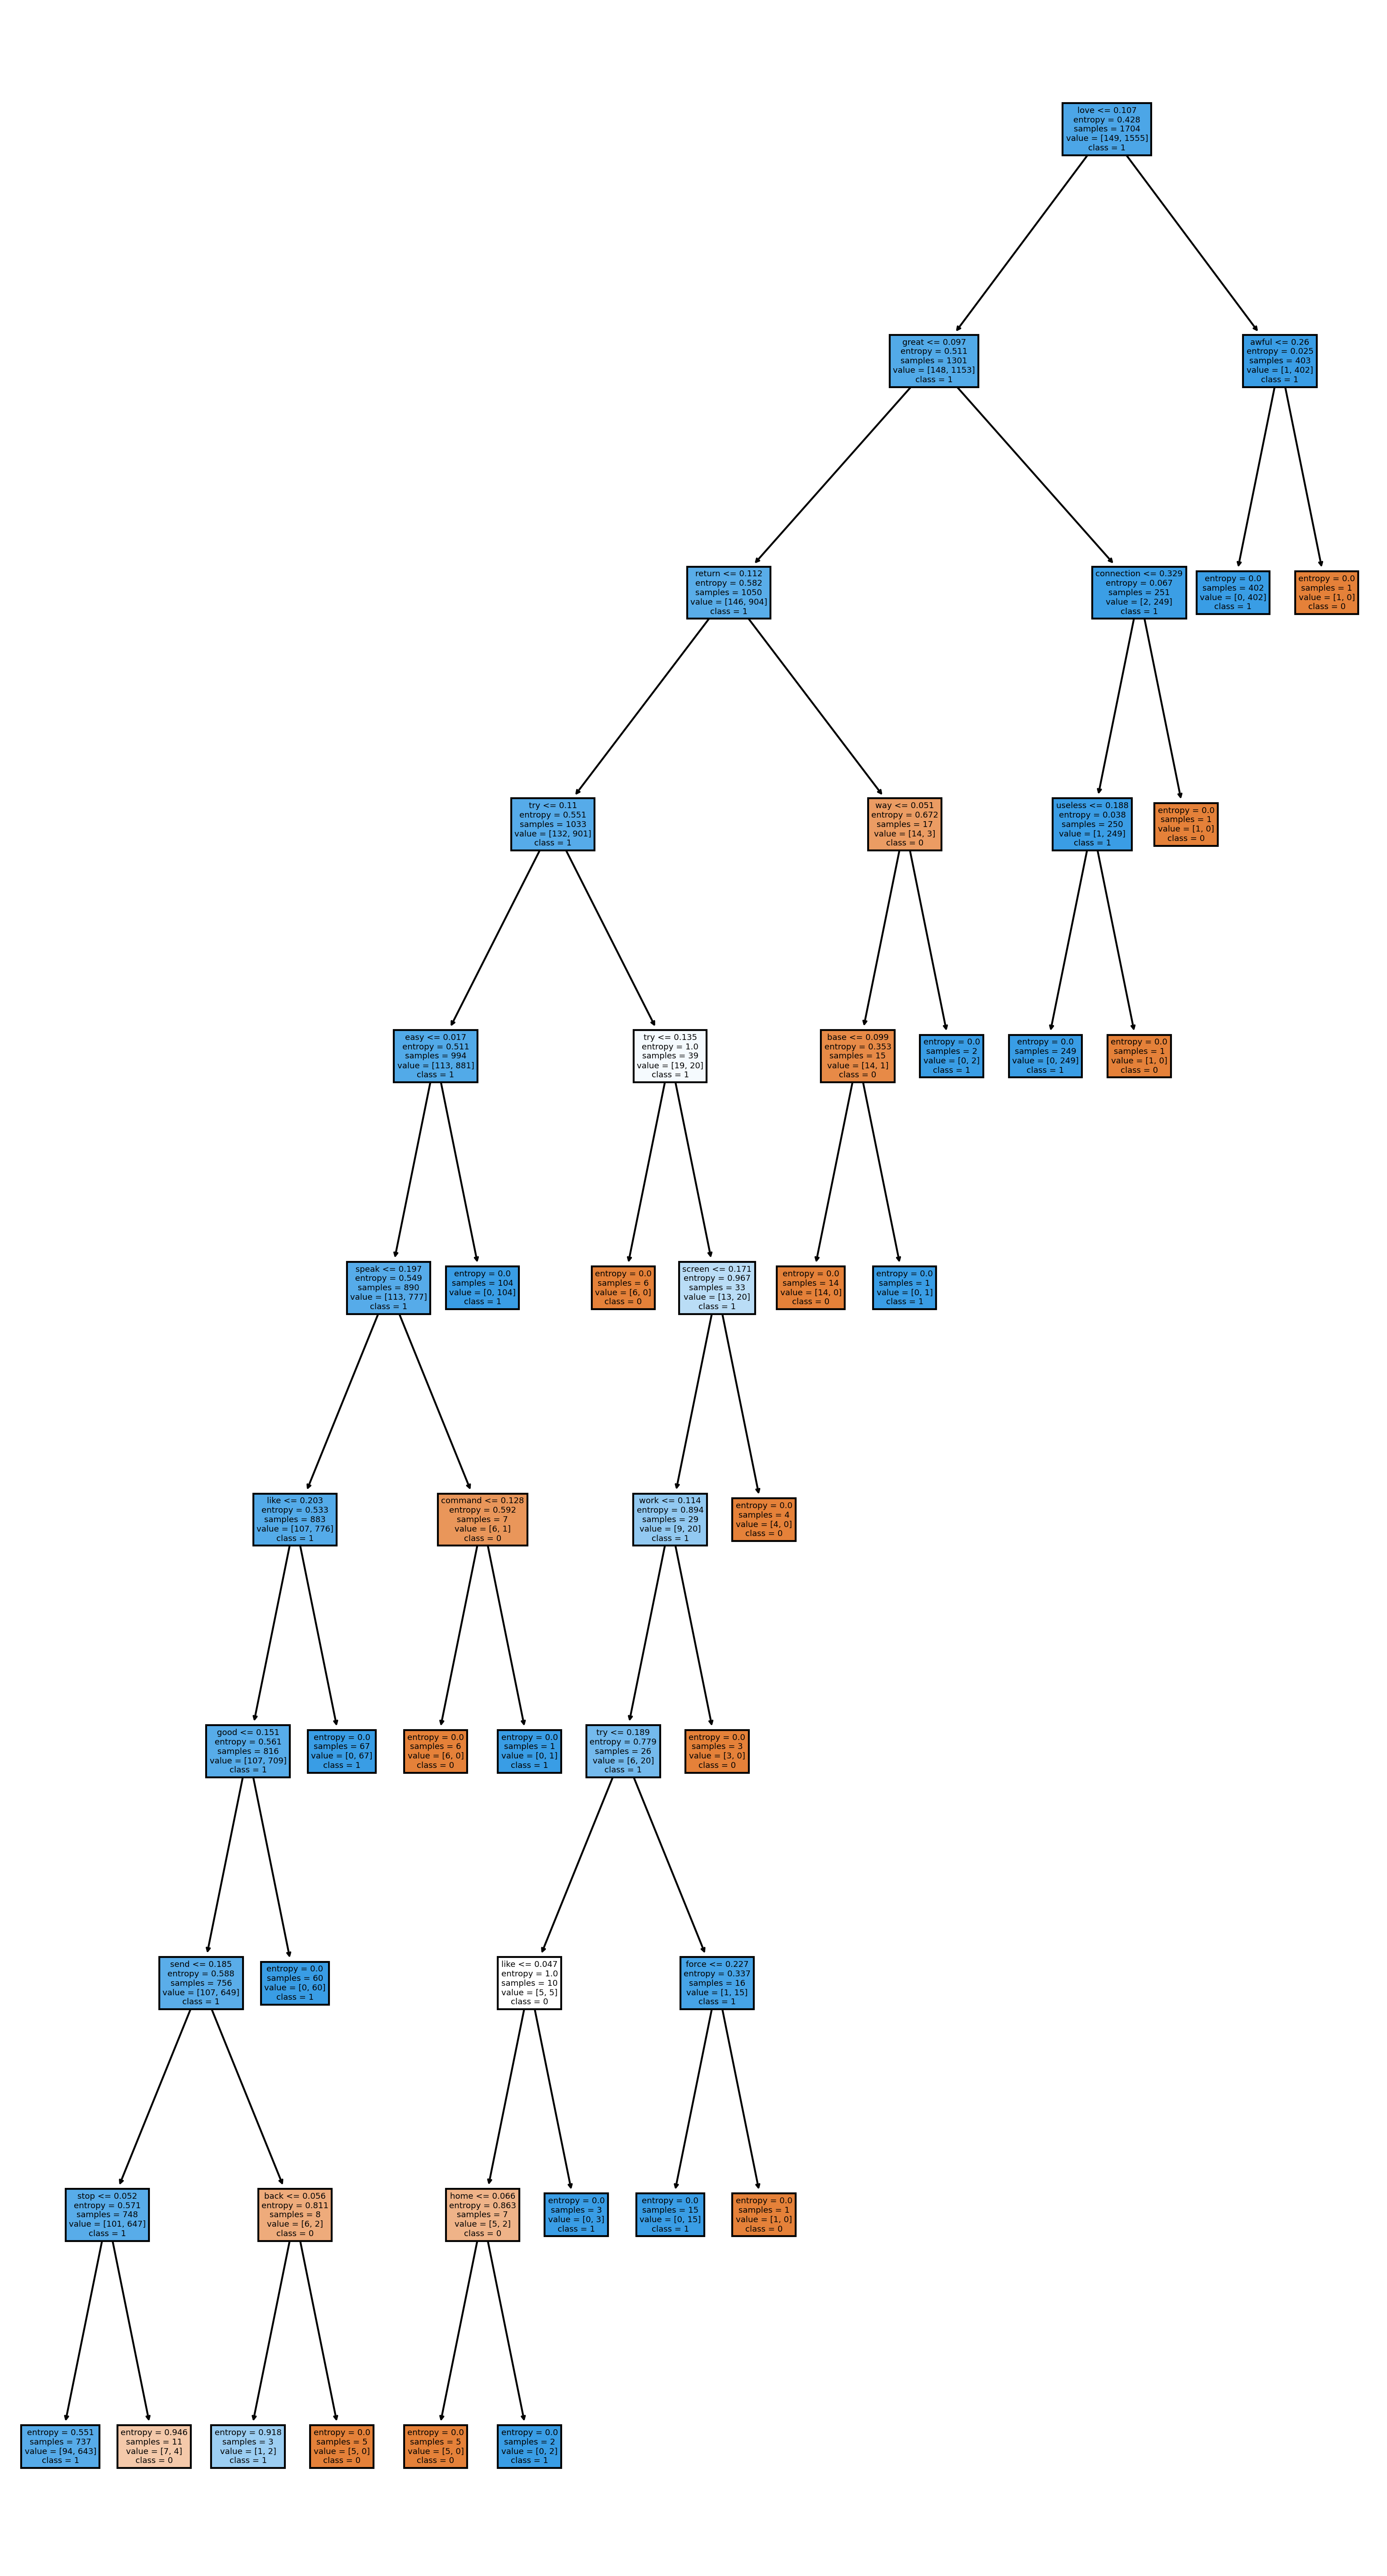

In [39]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (13,25), dpi=300)
tree.plot_tree(clf_01,
               feature_names = vectorizer.get_feature_names_out(), 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

### Model 2

C:\Users\fmartinezflores\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


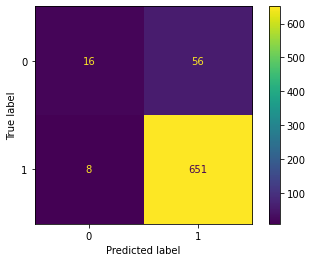

                   precision    recall  f1-score   support

positive_feedback       0.67      0.22      0.33        72
negative_feedback       0.92      0.99      0.95       659

         accuracy                           0.91       731
        macro avg       0.79      0.61      0.64       731
     weighted avg       0.90      0.91      0.89       731



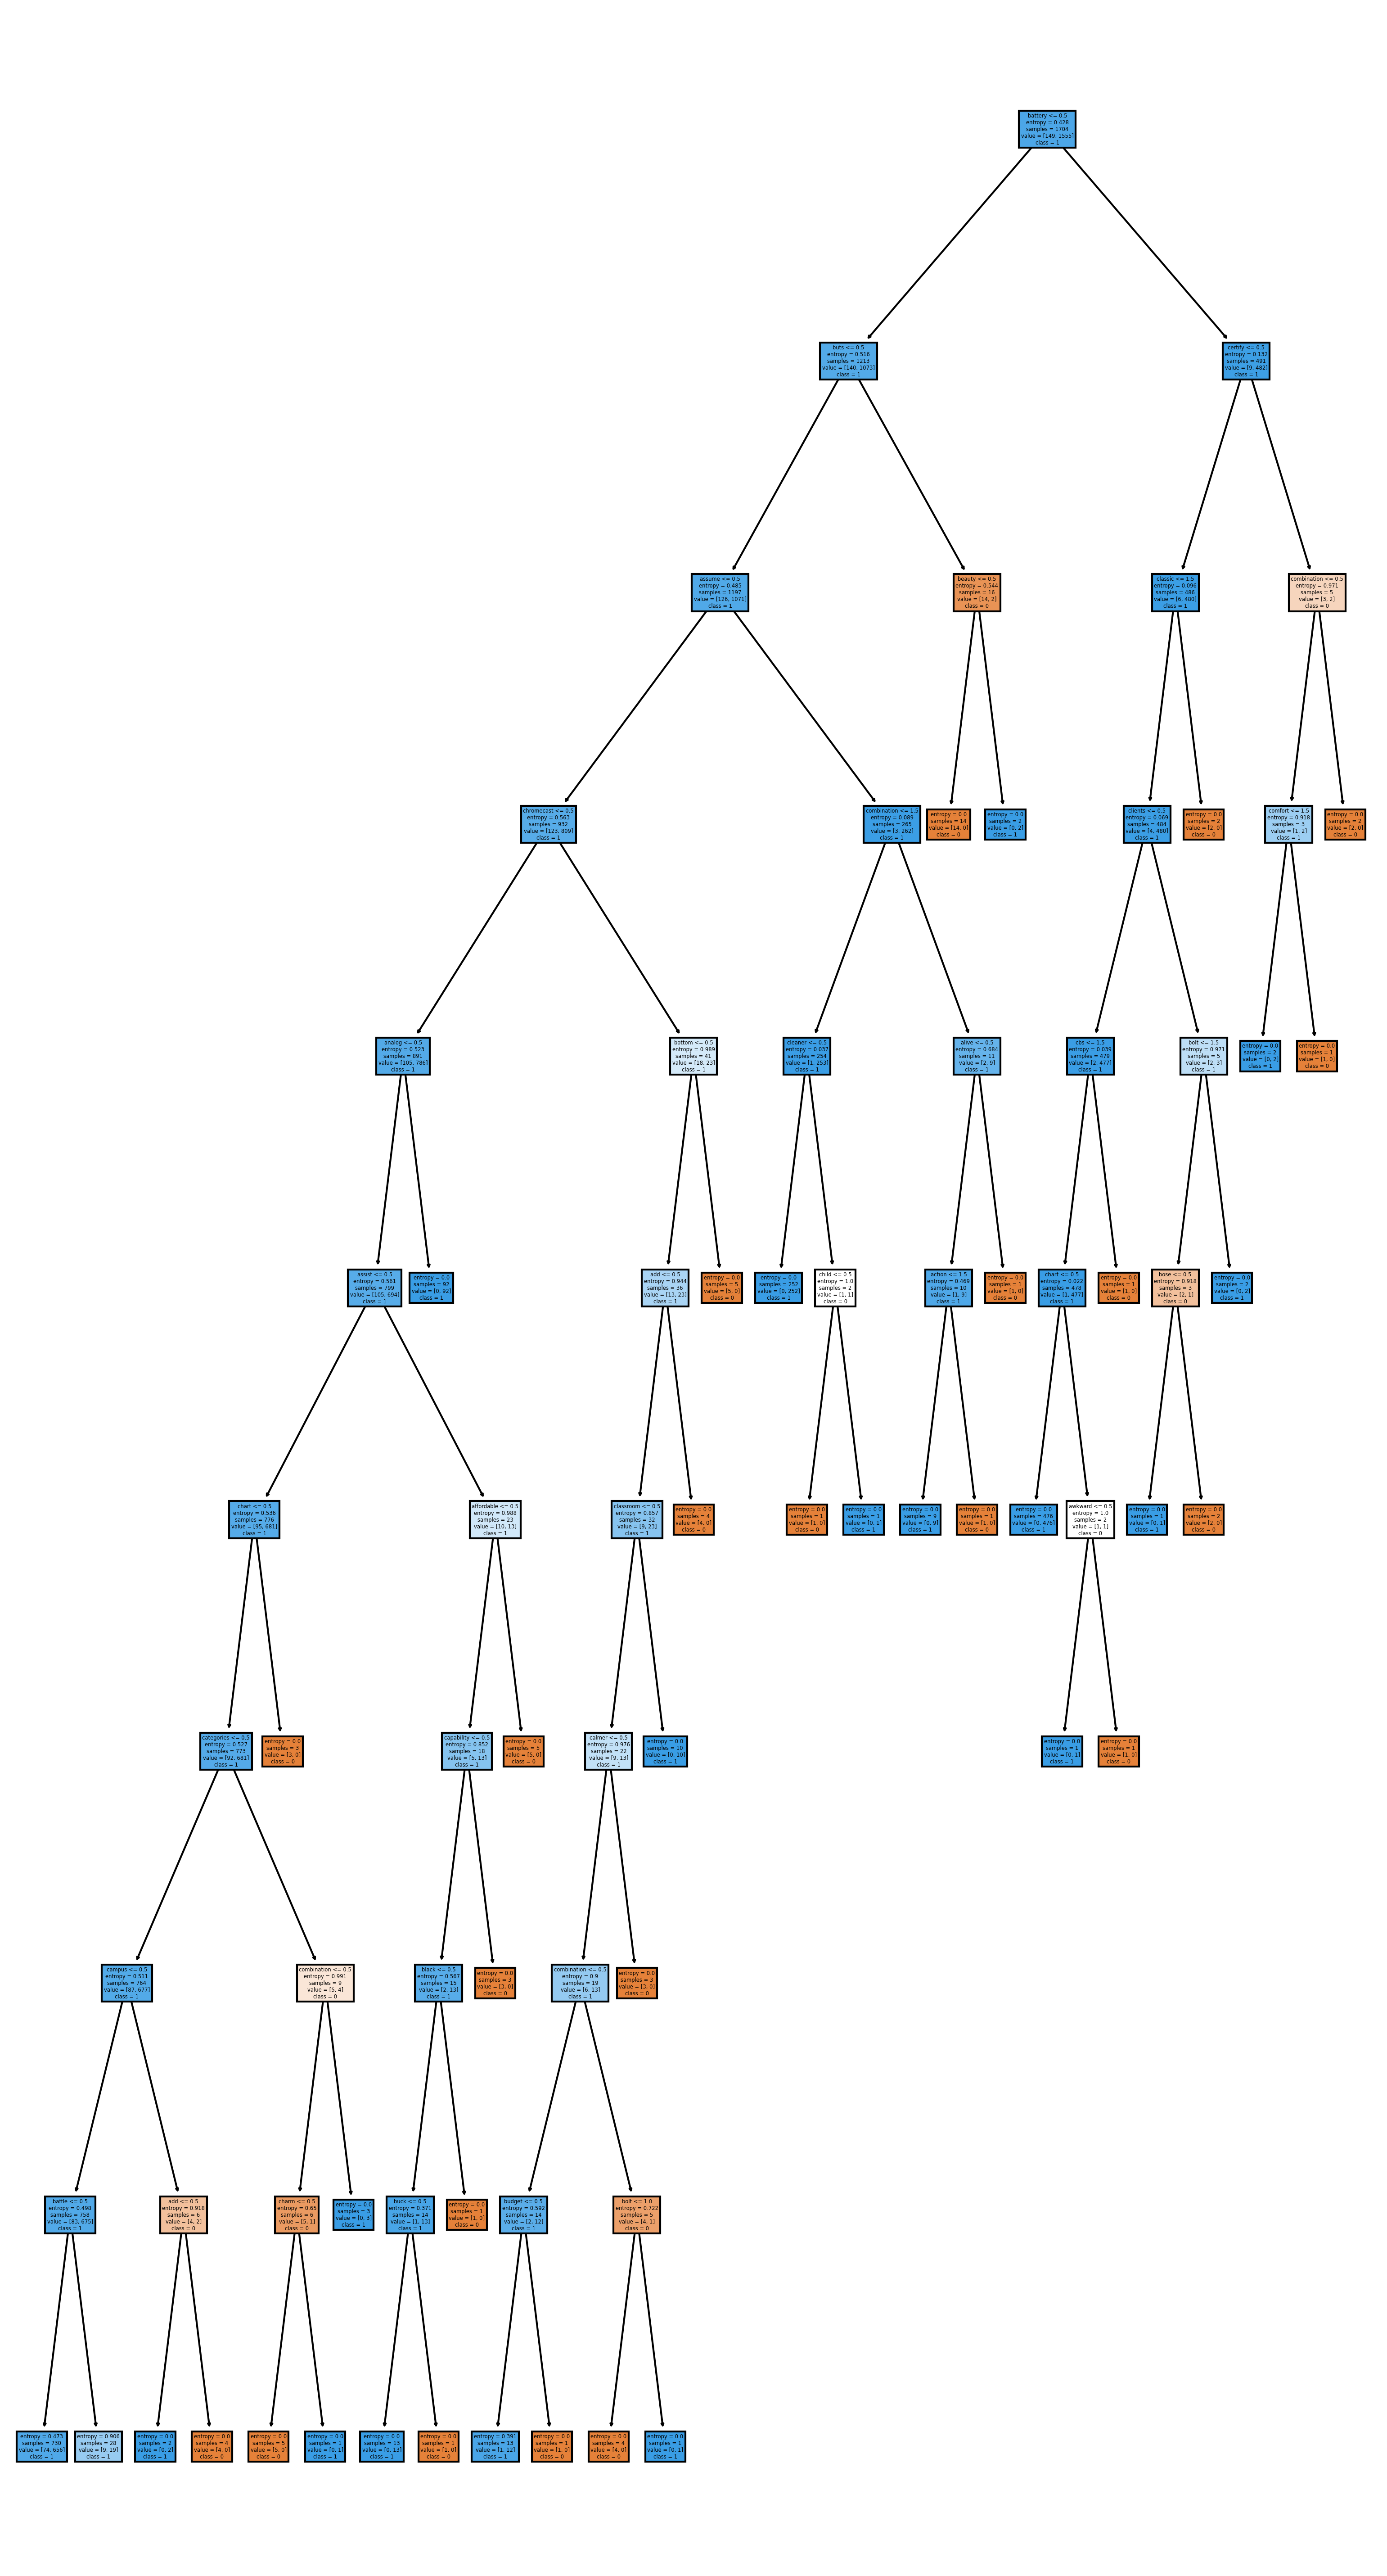

In [40]:
# Initialize the vectorizer
vectorizer_02 = CountVectorizer(min_df=10)

# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer_02.fit_transform(amazon_reviews_df['cleaned_reviews'])
y = amazon_reviews_df[['feedback']]

#X.shape # There are 2435 vectors (one for each review), each with 828 dimensions (one for each word).
#X[0]
#vectorizer.get_feature_names_out()

# Creating training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train 

# Create the classifier, fit it on the training data and make predictions on the test set
clf_01 = DecisionTreeClassifier(criterion='entropy', max_depth= 10)

clf_01.fit(X_train, y_train)

# Predictions
prediction_01 = clf_01.predict(X_test)
#prediction_01

# Calculating Acuraccy 
accuracy_score(y_test, prediction_01)

# Confusion Matrix
plot_confusion_matrix(clf_01, X_test, y_test, values_format='.3g')
plt.show()

# When class is 0 it gets it right 12 times, when class is 1 it gets it right 649 times

# Confusion Matrix
print(classification_report(y_test, prediction_01, target_names = ['positive_feedback','negative_feedback']))

fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (13,25), dpi=300)
tree.plot_tree(clf_01,
               feature_names = vectorizer.get_feature_names_out(), 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

### Model 3

C:\Users\fmartinezflores\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


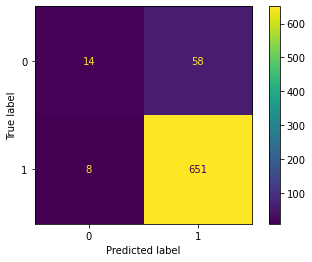

                   precision    recall  f1-score   support

positive_feedback       0.64      0.19      0.30        72
negative_feedback       0.92      0.99      0.95       659

         accuracy                           0.91       731
        macro avg       0.78      0.59      0.62       731
     weighted avg       0.89      0.91      0.89       731



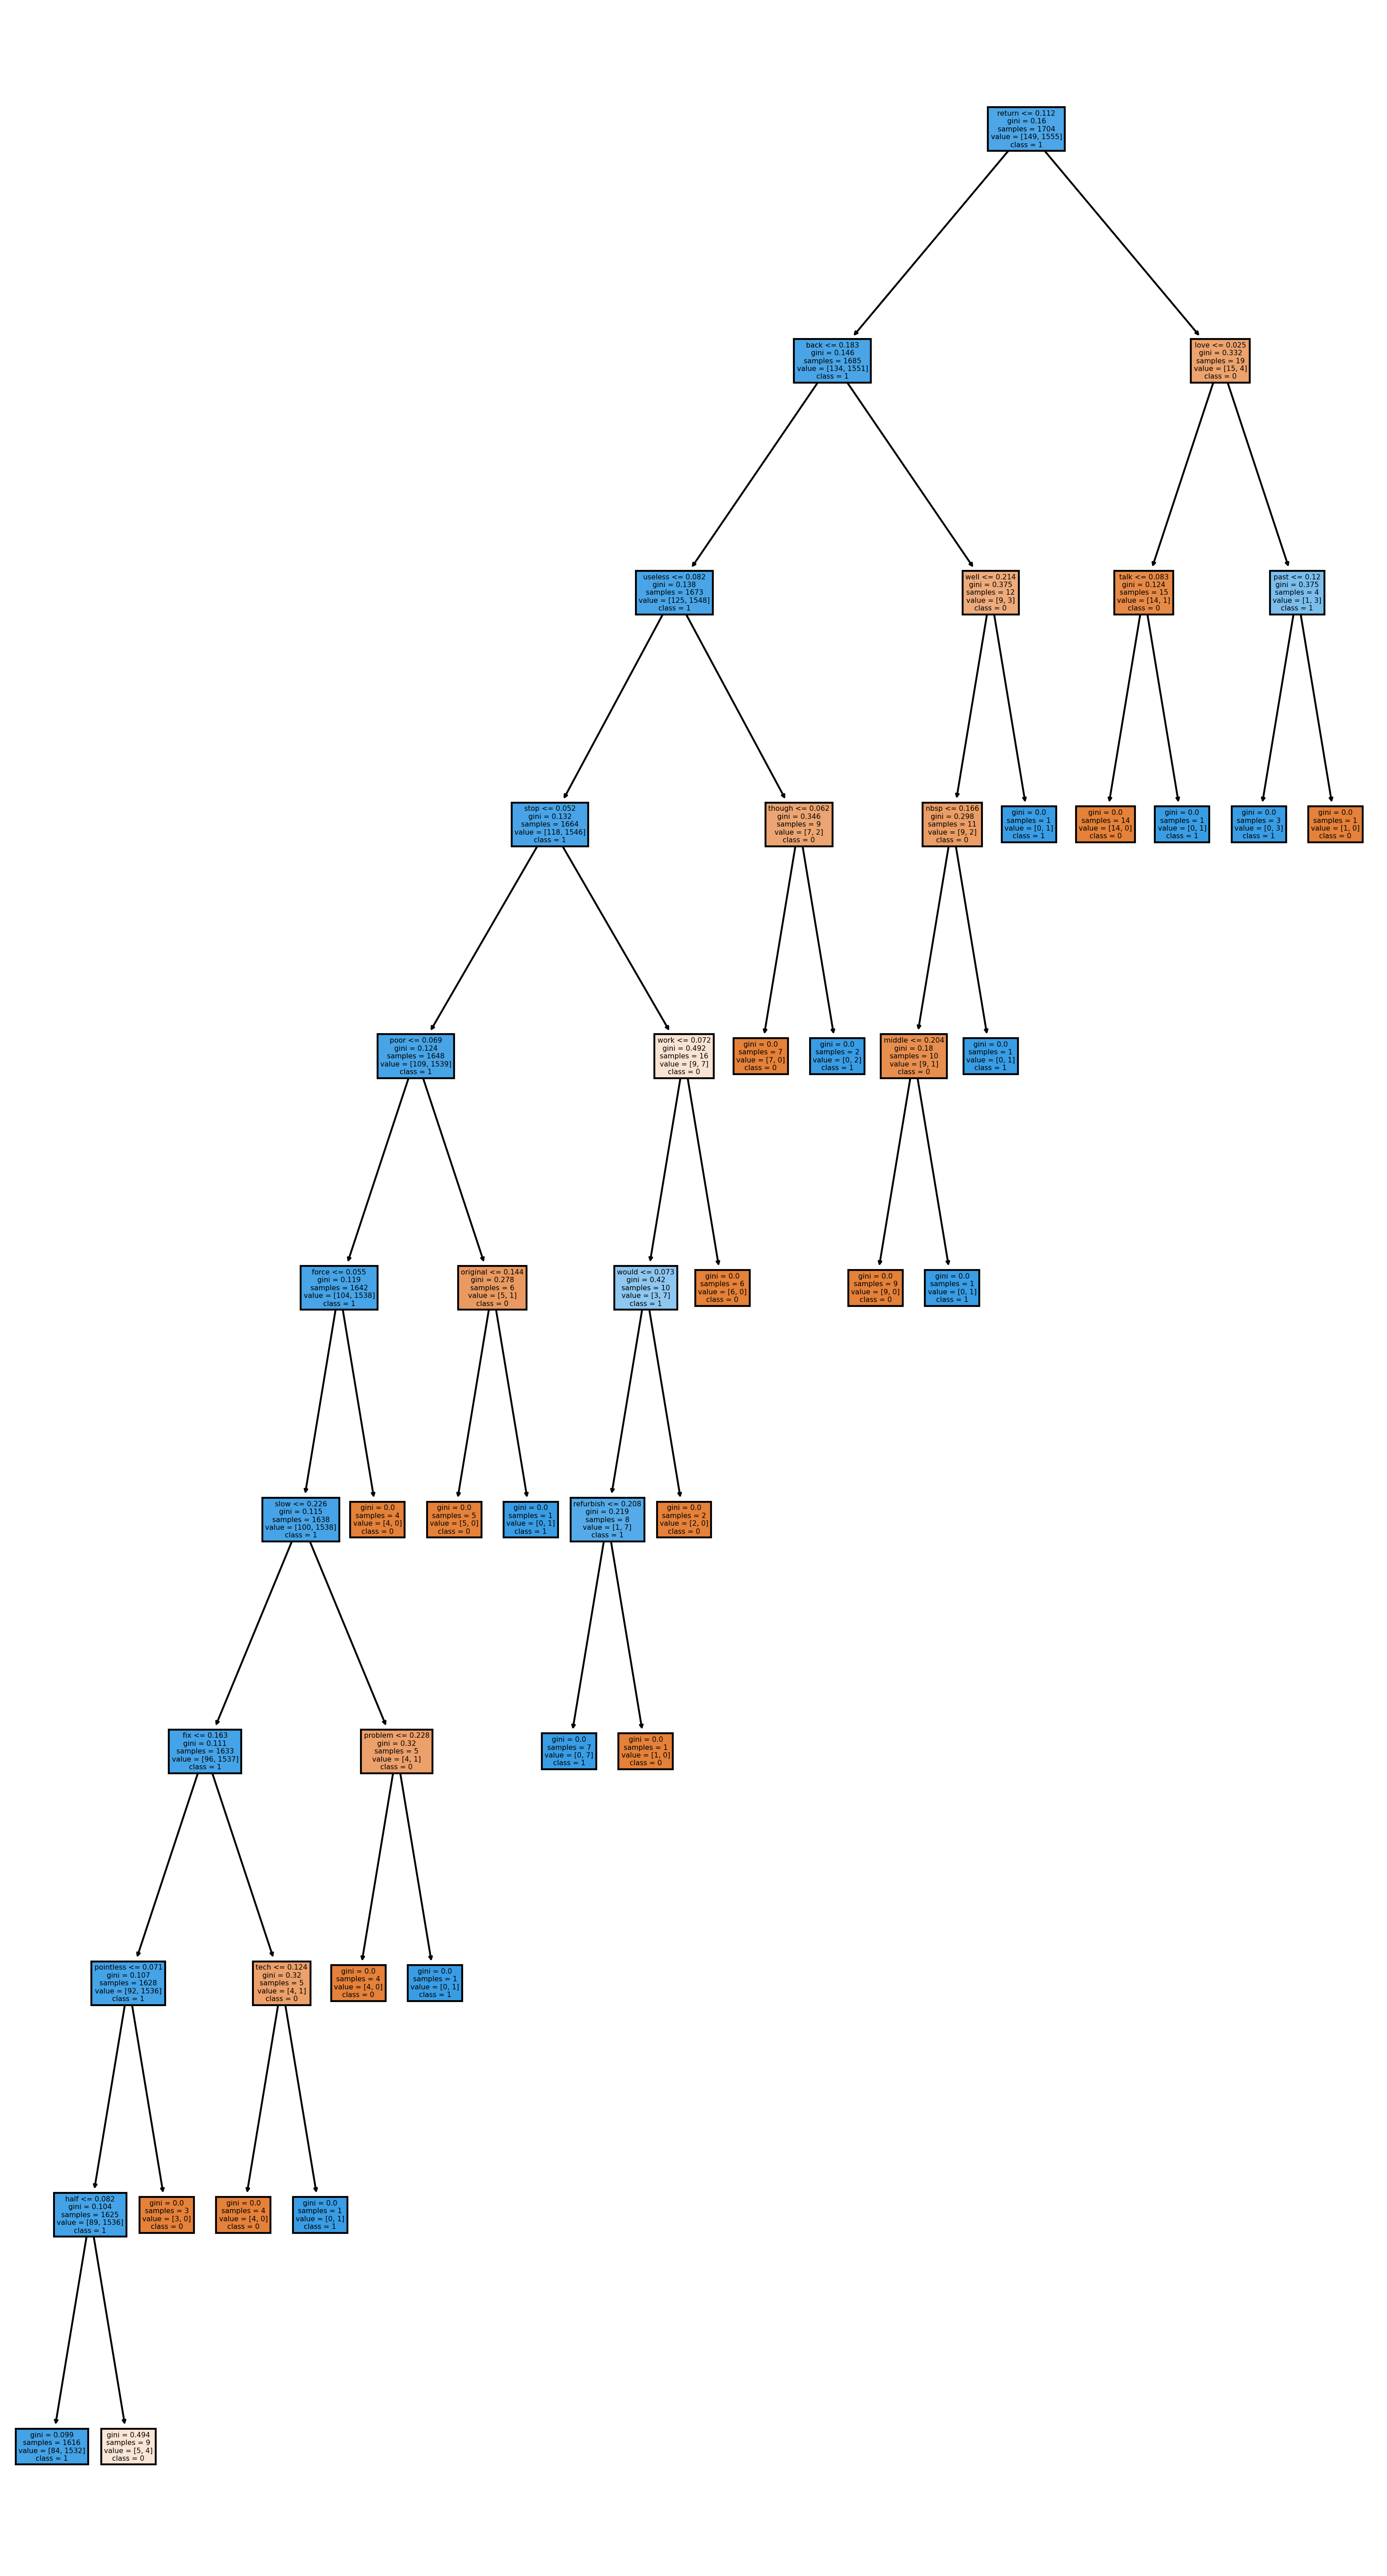

In [41]:
# Initialize the vectorizer
vectorizer_03 = TfidfVectorizer()

# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer_03.fit_transform(amazon_reviews_df['cleaned_reviews'])
y = amazon_reviews_df[['feedback']]

#X.shape # There are 2435 vectors (one for each review), each with 828 dimensions (one for each word).
#X[0]
#vectorizer.get_feature_names_out()

# Creating training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train 

# Create the classifier, fit it on the training data and make predictions on the test set
clf_01 = DecisionTreeClassifier(criterion='gini', max_depth= 10)

clf_01.fit(X_train, y_train)

# Predictions
prediction_01 = clf_01.predict(X_test)
#prediction_01

# Calculating Acuraccy 
accuracy_score(y_test, prediction_01)

# Confusion Matrix
plot_confusion_matrix(clf_01, X_test, y_test, values_format='.3g')
plt.show()

# When class is 0 it gets it right 12 times, when class is 1 it gets it right 649 times

# Confusion Matrix
print(classification_report(y_test, prediction_01, target_names = ['positive_feedback','negative_feedback']))

fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (13,25), dpi=300)
tree.plot_tree(clf_01,
               feature_names = vectorizer.get_feature_names_out(), 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

### Model 4

C:\Users\fmartinezflores\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


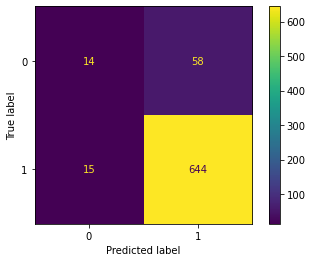

                   precision    recall  f1-score   support

positive_feedback       0.48      0.19      0.28        72
negative_feedback       0.92      0.98      0.95       659

         accuracy                           0.90       731
        macro avg       0.70      0.59      0.61       731
     weighted avg       0.87      0.90      0.88       731



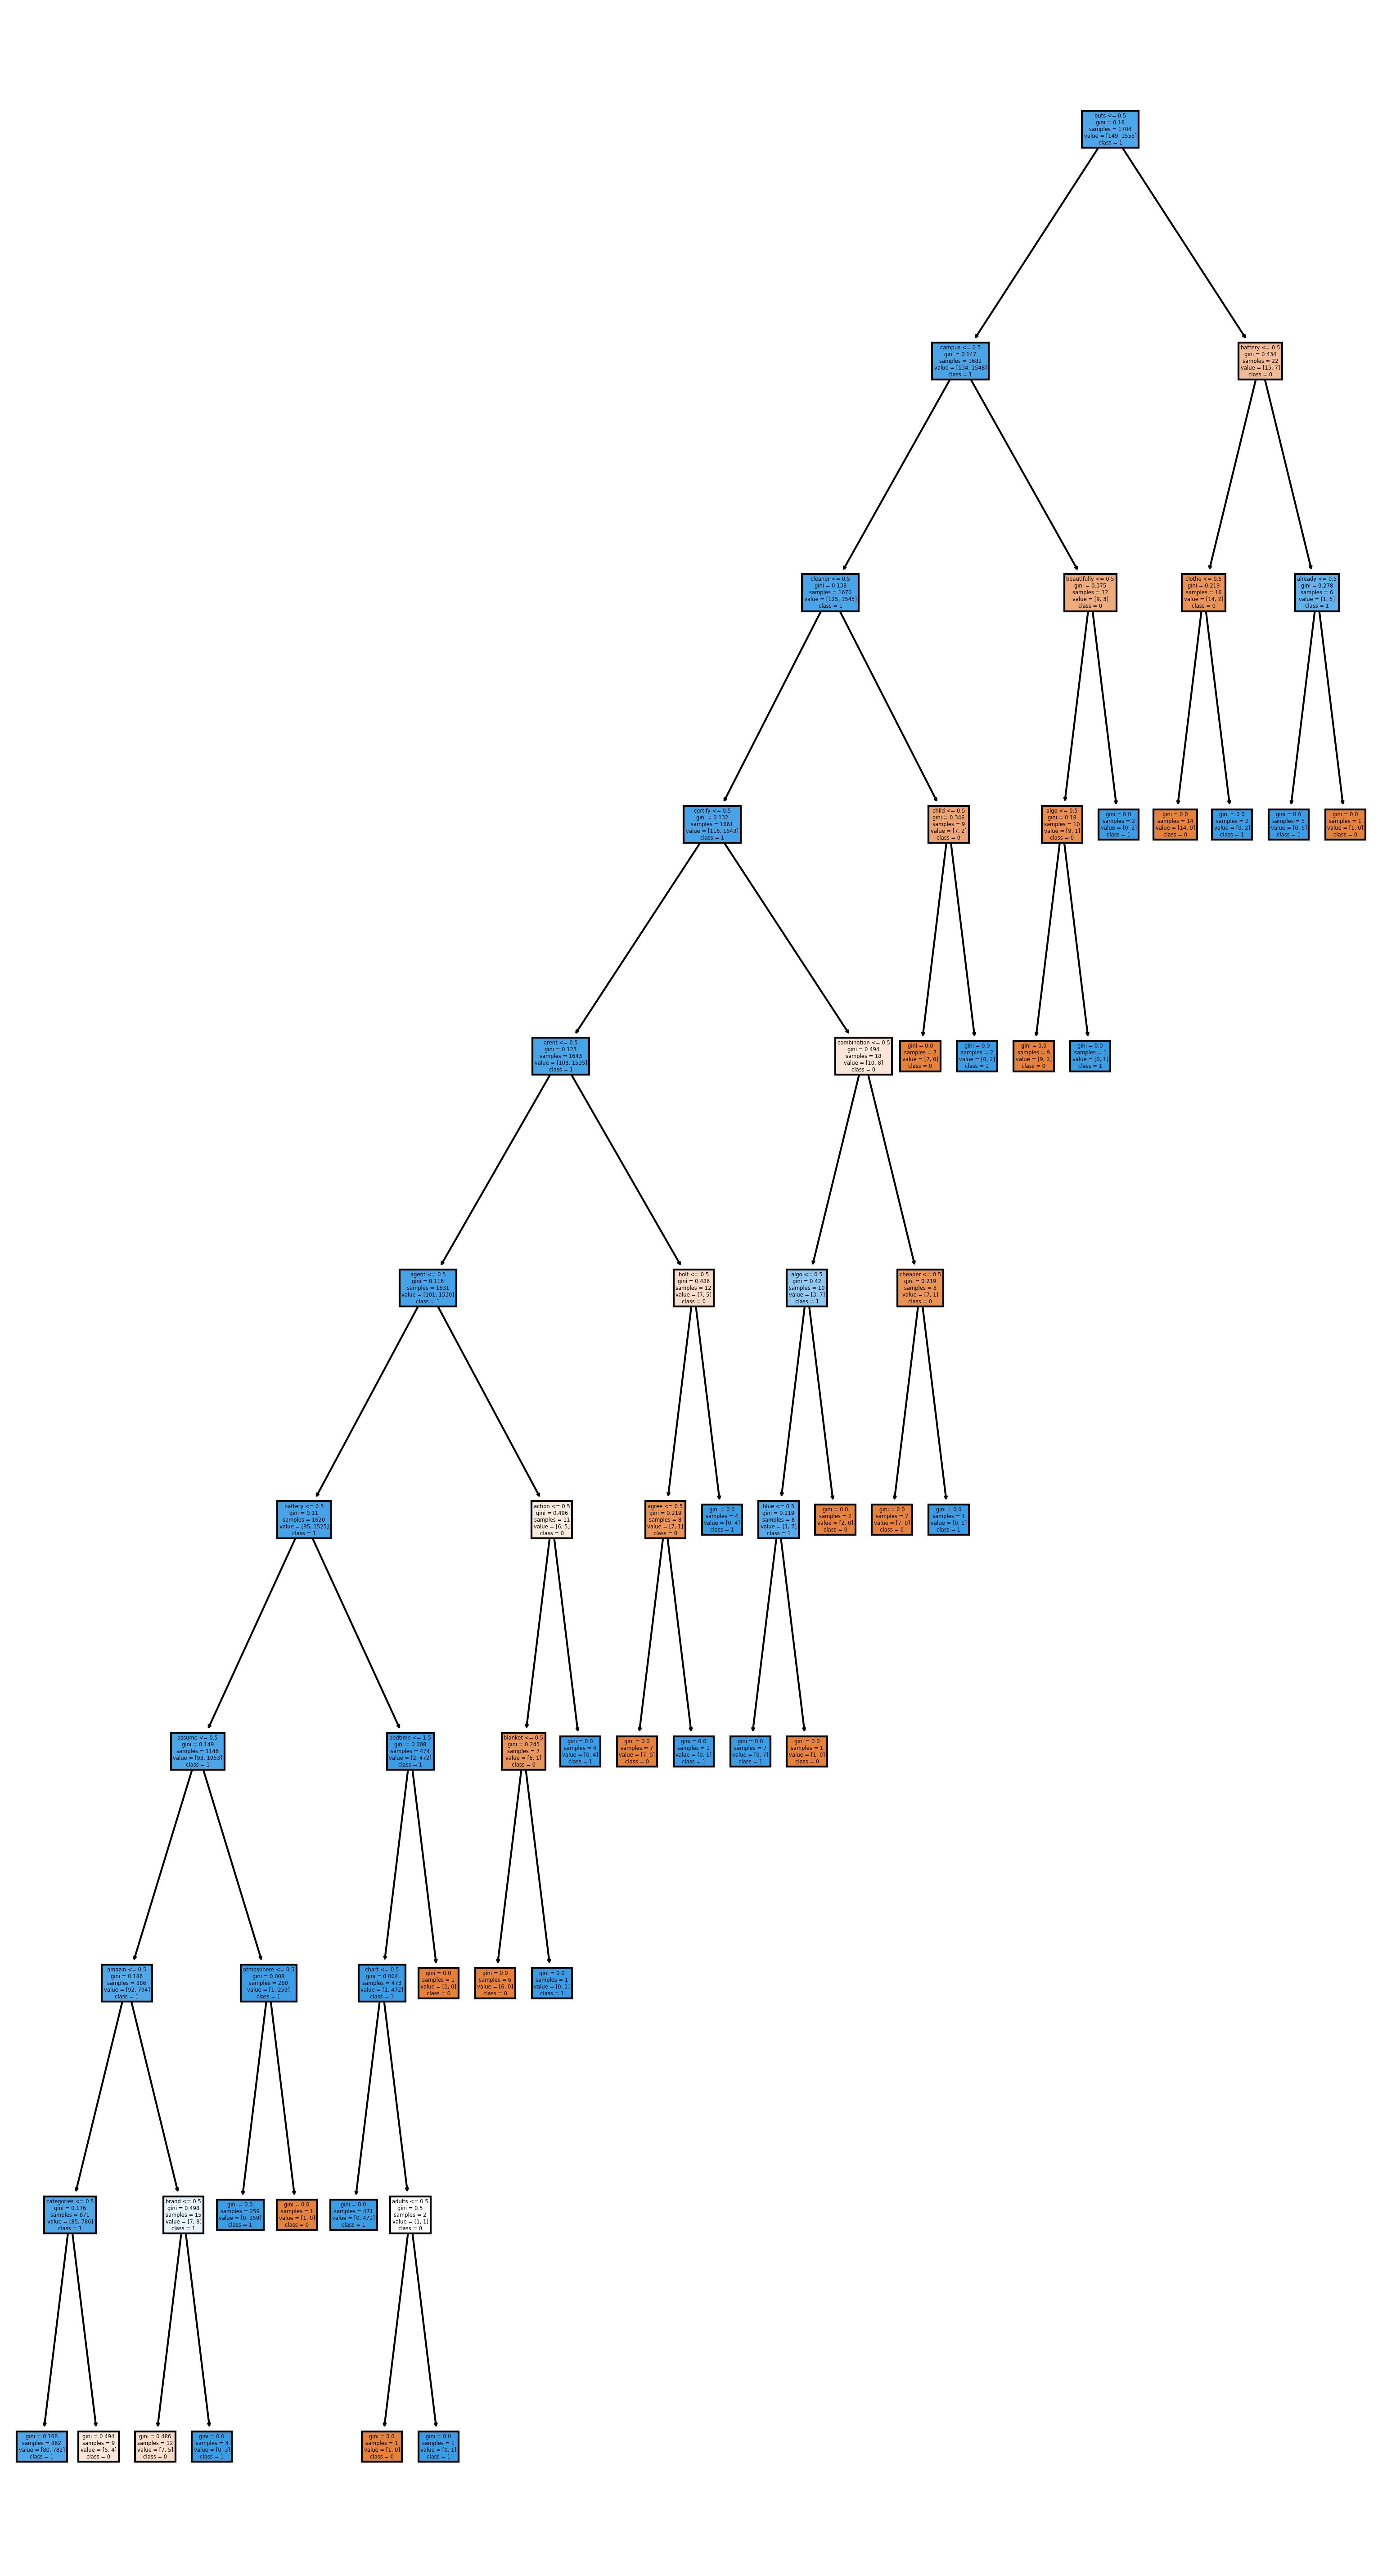

In [42]:
# Initialize the vectorizer
vectorizer_04 = CountVectorizer(min_df=10)

# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer_04.fit_transform(amazon_reviews_df['cleaned_reviews'])
y = amazon_reviews_df[['feedback']]

#X.shape # There are 2435 vectors (one for each review), each with 828 dimensions (one for each word).
#X[0]
#vectorizer.get_feature_names_out()

# Creating training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train 

# Create the classifier, fit it on the training data and make predictions on the test set
clf_01 = DecisionTreeClassifier(criterion='gini', max_depth= 10)

clf_01.fit(X_train, y_train)

# Predictions
prediction_01 = clf_01.predict(X_test)
#prediction_01

# Calculating Acuraccy 
accuracy_score(y_test, prediction_01)

# Confusion Matrix
plot_confusion_matrix(clf_01, X_test, y_test, values_format='.3g')
plt.show()

# When class is 0 it gets it right 12 times, when class is 1 it gets it right 649 times

# Confusion Matrix
print(classification_report(y_test, prediction_01, target_names = ['positive_feedback','negative_feedback']))

fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (13,25), dpi=300)
tree.plot_tree(clf_01,
               feature_names = vectorizer.get_feature_names_out(), 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

### Model 5

C:\Users\fmartinezflores\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


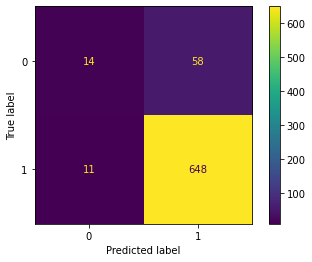

                   precision    recall  f1-score   support

positive_feedback       0.56      0.19      0.29        72
negative_feedback       0.92      0.98      0.95       659

         accuracy                           0.91       731
        macro avg       0.74      0.59      0.62       731
     weighted avg       0.88      0.91      0.88       731



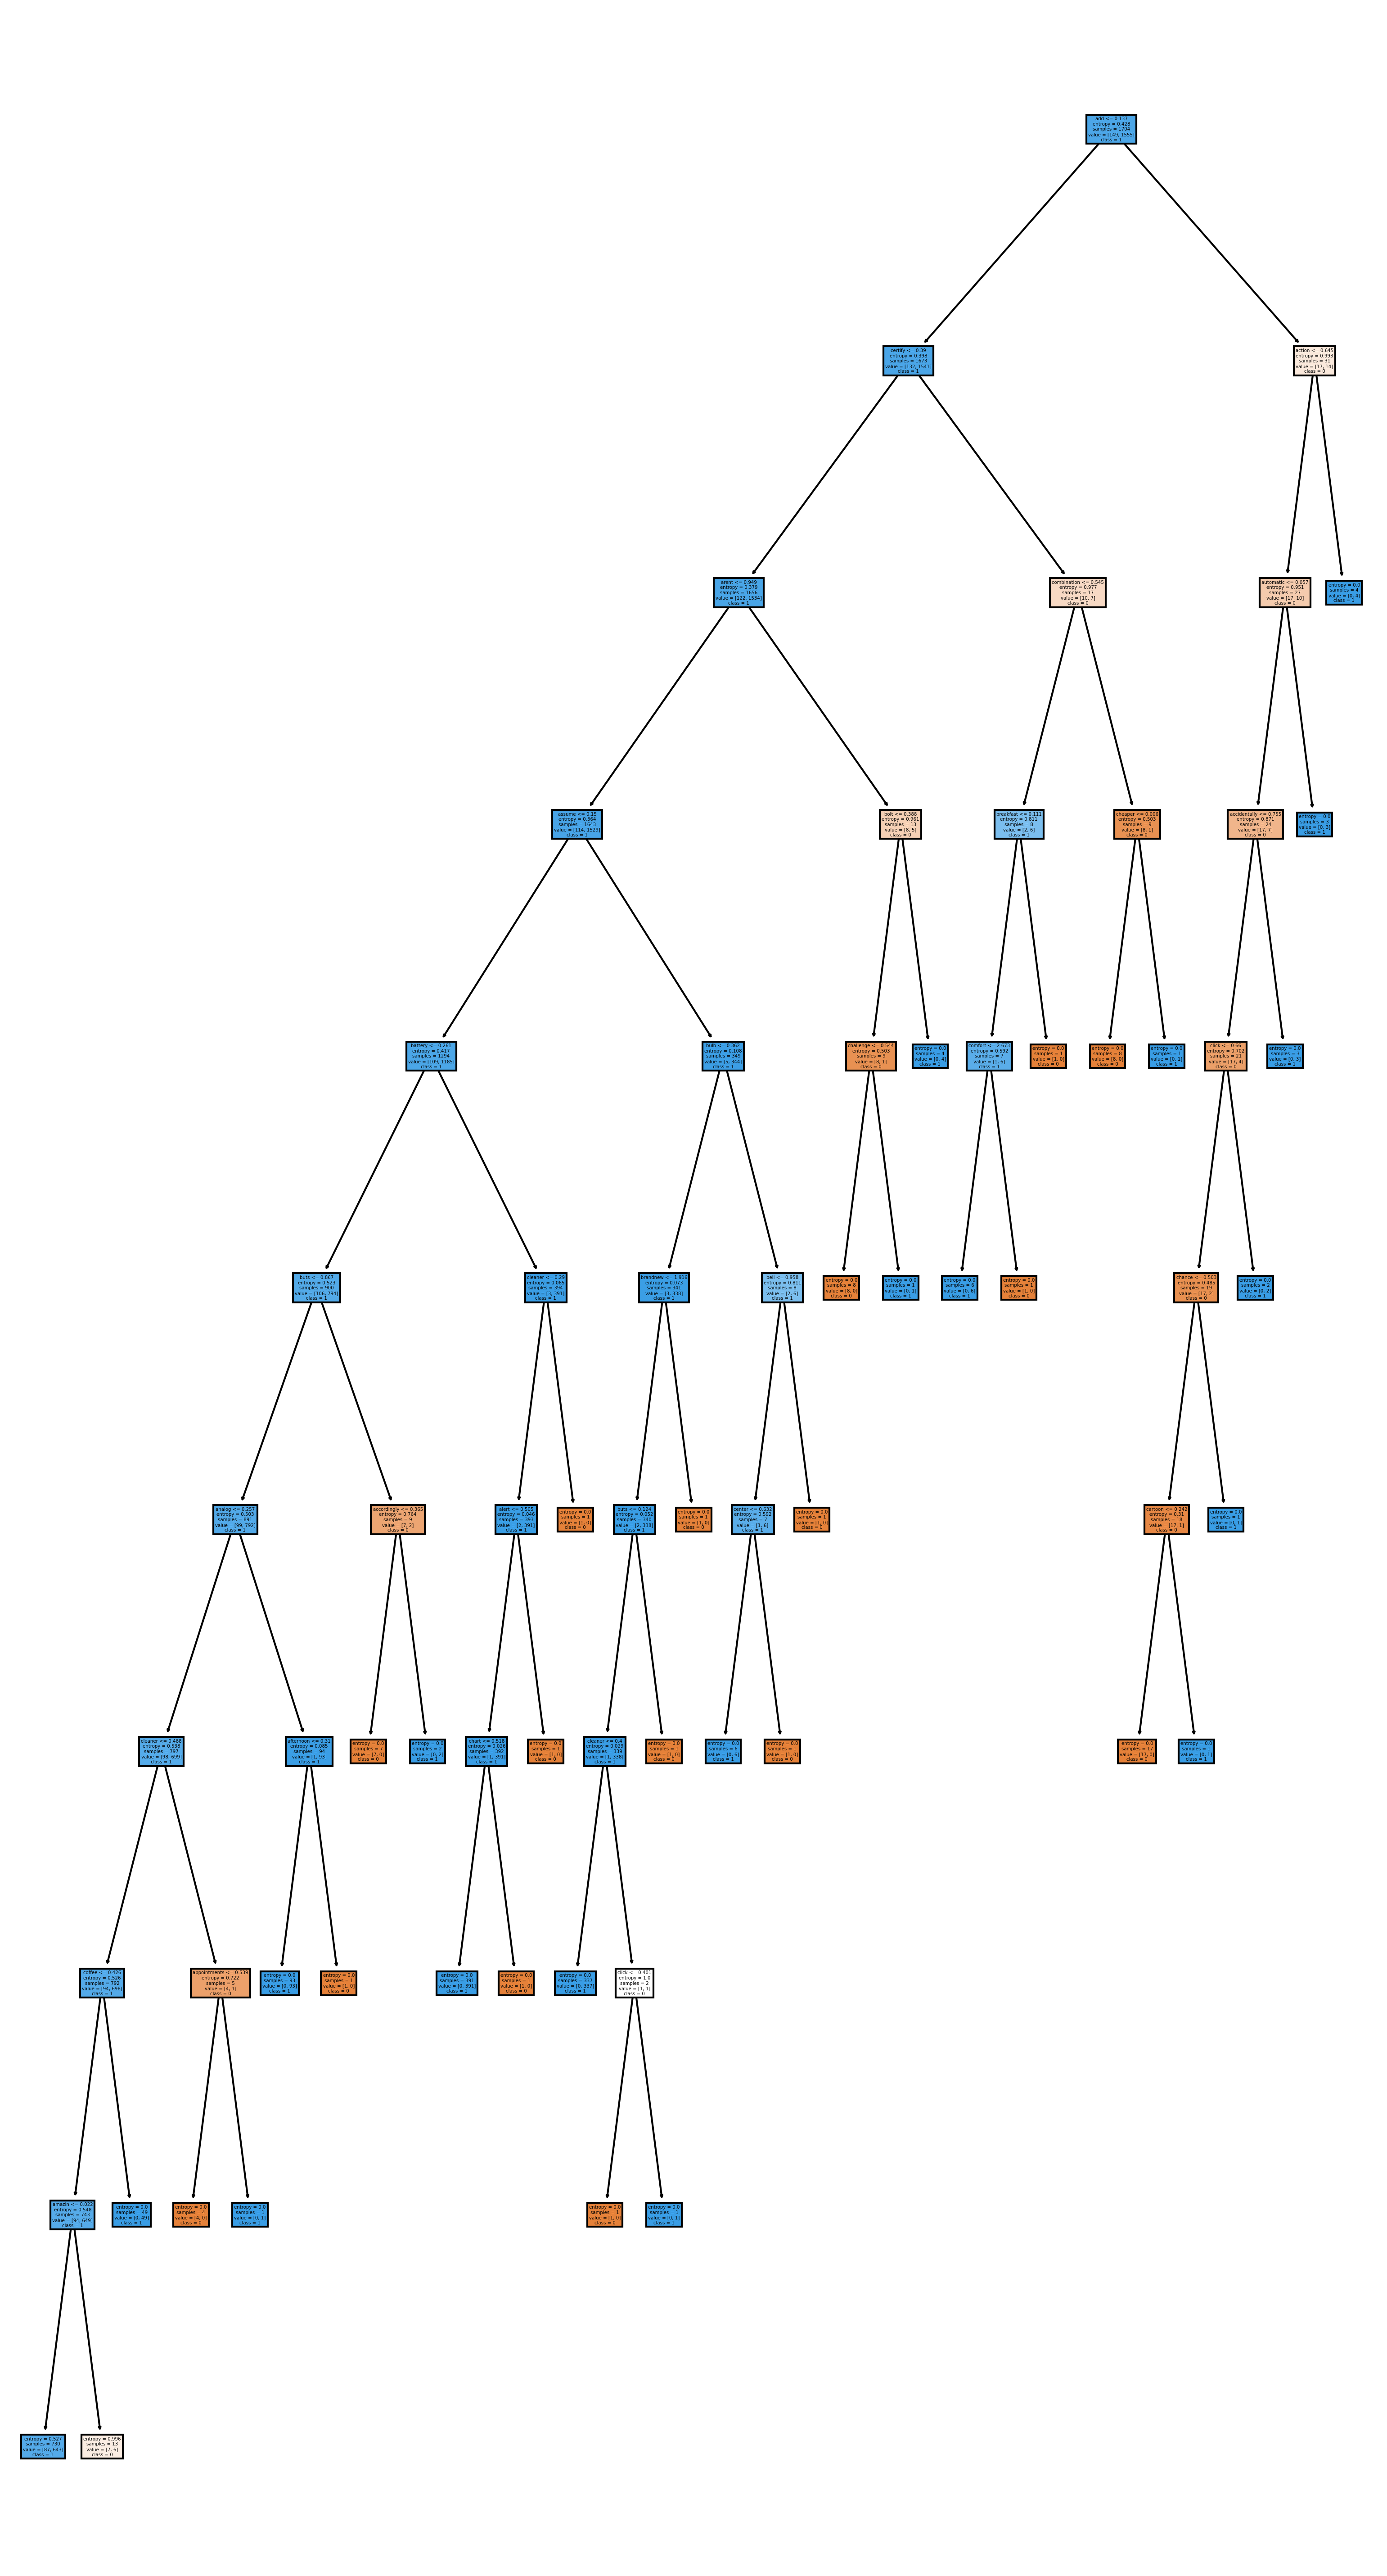

In [43]:
# Initialize the vectorizer
vectorizer_05 = CountVectorizer(min_df=10)

# fit_transform applies TF-IDF to clean texts - we save the array of vectors in X
X = vectorizer_05.fit_transform(amazon_reviews_df['cleaned_reviews'])
y = amazon_reviews_df[['feedback']]

#X.shape # There are 2435 vectors (one for each review), each with 828 dimensions (one for each word).
#X[0]
#vectorizer.get_feature_names_out()

# Creating training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train 

# Create the classifier, fit it on the training data and make predictions on the test set
clf_01 = DecisionTreeClassifier(criterion='entropy', max_depth= 10, splitter='random')

clf_01.fit(X_train, y_train)

# Predictions
prediction_01 = clf_01.predict(X_test)
#prediction_01

# Calculating Acuraccy 
accuracy_score(y_test, prediction_01)

# Confusion Matrix
plot_confusion_matrix(clf_01, X_test, y_test, values_format='.3g')
plt.show()

# When class is 0 it gets it right 12 times, when class is 1 it gets it right 649 times

# Confusion Matrix
print(classification_report(y_test, prediction_01, target_names = ['positive_feedback','negative_feedback']))

fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (13,25), dpi=300)
tree.plot_tree(clf_01,
               feature_names = vectorizer.get_feature_names_out(), 
               class_names=np.unique(y).astype('str'),
               filled = True)
plt.show()

## Evaluation

Comparing the accuracy of the different models to predict whether a comment is negative or positive is *Model 3*:

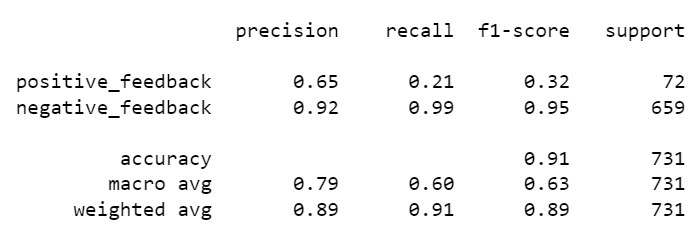

#### Precision

Precision measures how precise the predictions are, in this model, when class is 1 (positive review) it gets it right 12 times, when class is 0 (negative review) it gets it right 649 times.

#### Recall 

Recall indicates what percentage of the classes we're interested in were actually captured by the model. 

In this case, 21% percentage of all positive the reviews input to the model were correctly identify as "Positive" and 99% percentage of all the negative reviews input to the model were correctly identify as "Negative".

#### F1-Score

F1 score represents the Harmonic Mean of Precision and Recall. This means that the F1 score cannot be high without both precision and recall also being high.

In this model F1 is high for negative feedback, and low for positive feedback, this means its doing good to predict if a input is a negative review. 

#### Accuracy

Accuracy is useful because it allows us to measure the total number of predictions a model gets right, in this model we have a accuracy of 91%

## Conclusion

Although the model is not very good, it is not the worst. Apparently we have gotten good results in predicting if a review is bad, however it is highly unlikely that this will happen since most of the reviews in this dataset are positive, it would make more sense for the model to identify more accurately a positive comment because it has more samples to learn from them.

This is possible because both positive and negative feedback can include the same words and as they enter the model by themselves, without knowing the context of the sentence it is difficult for the model to identify its sense.


A good way to attack this problem would be introducing to the model sets of words, specifically bi-grams and tri-grams that can give more information to the model.

Surely, by doing it this way you will be able to appreciate a greater difference between positive and negative comments and it would increase the precision with which it predicts a positive comment.

This work will continue on improving this model by changing the model's input from a single word to sets of words. In the same way, these "n-grams" will be used subsequently to create a cluster that can determine the issues most addressed by clients and their favorite skills.
